### CHANGING WORKING DIRECTORY

In [1]:
import os
os.chdir(r'D:\MCT\Python Project\Project_Final')
os.getcwd()

'D:\\MCT\\Python Project\\Project_Final'

In [2]:
import warnings
warnings.filterwarnings('ignore')

### IMPORT LIBRARY

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from datetime import datetime, timedelta,date
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
app_df=pd.read_csv('D:\\MCT\\Python Project\Project Credit Card_Pavithra Naresh Kumar\Dataset\\application_record.csv')
credit_df=pd.read_csv('D:\\MCT\\Python Project\\Project Credit Card_Pavithra Naresh Kumar\\Dataset\\credit_record.csv')
app_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


#### Days_Birth and Days Employed is negative -- need to check 

In [14]:
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


#### Month_balance is in negative need to do further analysis

### MERGING DATASET

#### we merge both dataset using inner join, which means use intersection of keys from both frames,preserve the order of the left keys.

In [15]:
df = app_df.merge(credit_df, how='inner', on=['ID'])

### SHAPE OF DATAFRAME

In [16]:
print("Shape of Application Dataframe:",app_df.shape)
print("Shape of Credit Dataframe:",credit_df.shape)
print("Shape of Merged Dataframe:",df.shape)

Shape of Application Dataframe: (438557, 18)
Shape of Credit Dataframe: (1048575, 3)
Shape of Merged Dataframe: (777715, 20)


#### Application Dataframe has 438557 rows and 18 columns and Credit dataframe has 1048575 rows and 3 columns. After merging using inner joining, dataframe has 777715 rows and 20 columns.

### DATA PROFILING

In [ ]:
Credit_Report = pp.ProfileReport(df,title="Credit_Report")
Credit_Report.to_file("Credit_Report.html")

### UNIQUE VALUE

In [17]:
app_df.apply(lambda x: len(x.unique()))

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            19
CNT_FAM_MEMBERS            13
dtype: int64

In [18]:
credit_df.apply(lambda x: len(x.unique()))

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [19]:
df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

### EDA (Exploratory Data Analysis)

In [20]:
#checking head of dataset
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C


In [21]:
#checking tail od dataset
df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-13,0


In [22]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
MONTHS_BALANCE           int64
STATUS                  object
dtype: object

#### There are 9 categorical variable and 11 numerical variable

In [23]:
#checking Column names
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [24]:
#Descriptive Statistics
pd.options.display.float_format = "{:.2f}".format
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00,777715.00
mean,5078742.95,0.43,188534.80,-16124.94,57775.83,1.00,0.23,0.30,0.09,2.21,-19.37
std,41804.42,0.75,101622.45,4104.30,136471.74,0.00,0.42,0.46,0.29,0.91,14.08
min,5008804.00,0.00,27000.00,-25152.00,-15713.00,1.00,0.00,0.00,0.00,1.00,-60.00
25%,5044568.50,0.00,121500.00,-19453.00,-3292.00,1.00,0.00,0.00,0.00,2.00,-29.00
50%,5069530.00,0.00,162000.00,-15760.00,-1682.00,1.00,0.00,0.00,0.00,2.00,-17.00
75%,5115551.00,1.00,225000.00,-12716.00,-431.00,1.00,0.00,1.00,0.00,3.00,-8.00
max,5150487.00,19.00,1575000.00,-7489.00,365243.00,1.00,1.00,1.00,1.00,20.00,0.00


In [25]:
#Data Description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,777715.00,NaN,NaN,NaN,5078742.95,41804.42,5008804.00,5044568.50,5069530.00,5115551.00,5150487.00
CODE_GENDER,777715,2,F,518851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,777715,2,N,473355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,777715,2,Y,512948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,777715.00,NaN,NaN,NaN,0.43,0.75,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,777715.00,NaN,NaN,NaN,188534.80,101622.45,27000.00,121500.00,162000.00,225000.00,1575000.00
NAME_INCOME_TYPE,777715,5,Working,400164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_EDUCATION_TYPE,777715,5,Secondary / secondary special,524261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_FAMILY_STATUS,777715,5,Married,546619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_HOUSING_TYPE,777715,6,House / apartment,697151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CORRELATION MAP

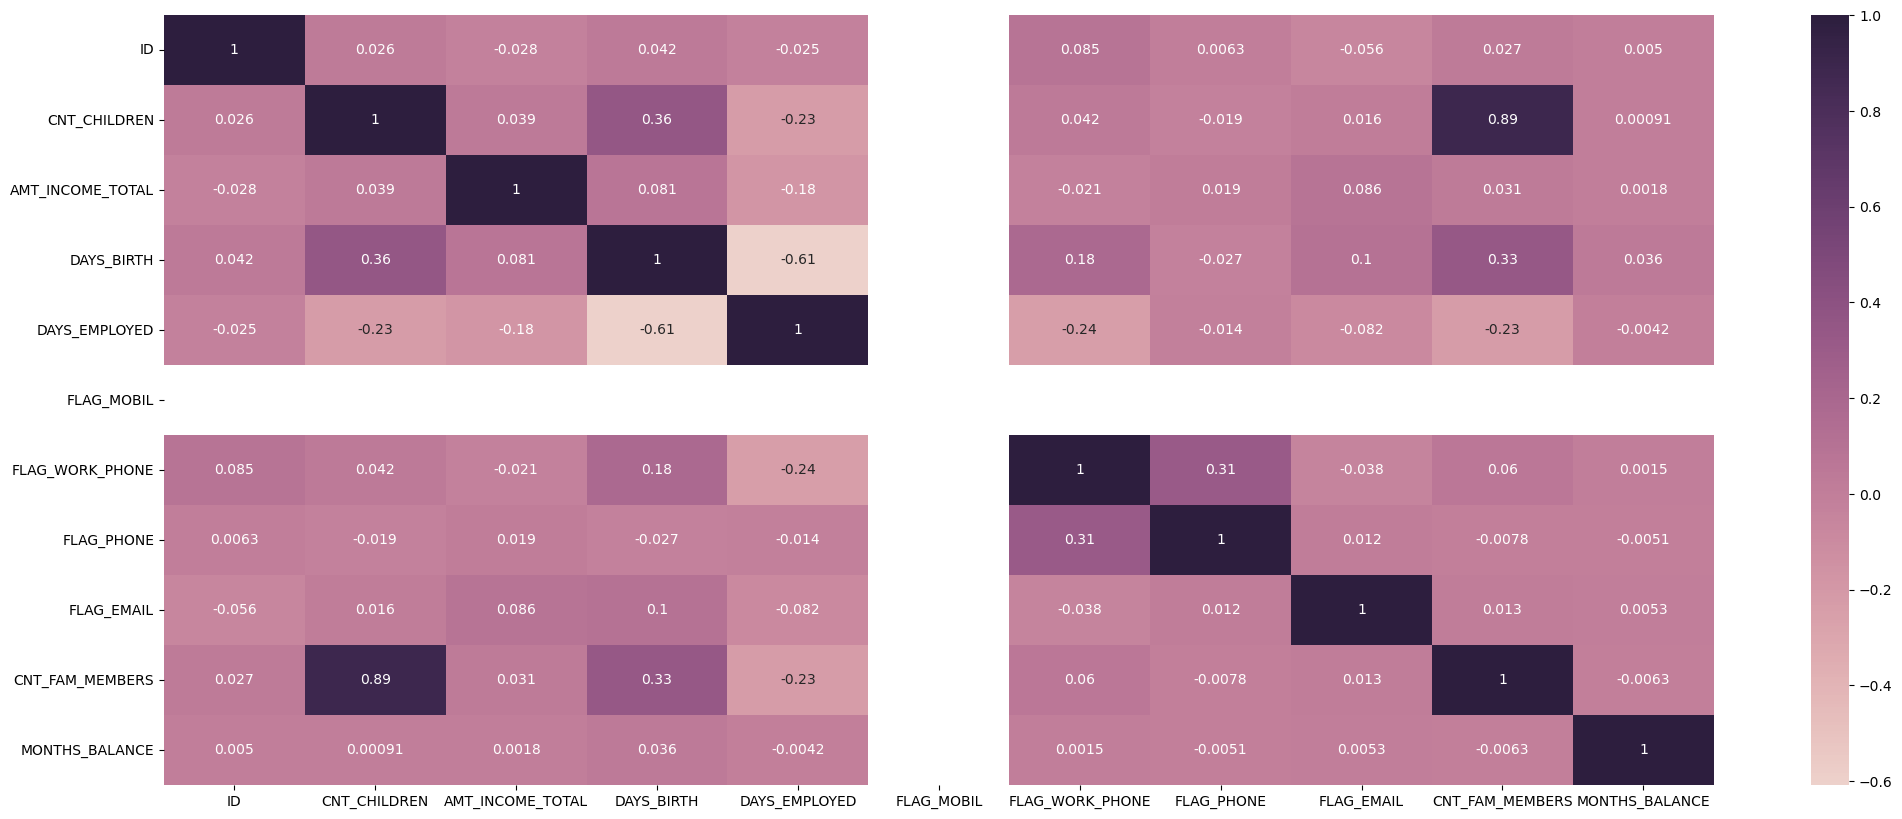

In [26]:
fig, ax = plt.subplots(figsize=(25,10))
_ = sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

###### INFERENCE:

- 1) FLAG_MOBIL Column has no relationship with any variables.
- 2) CNT_FAM_MEMBERS and CNT_CHILDREN have positive relationship with each other.
- 3) FLAG_WORK_PHONE and FLAG_PHONE have relationship.
- 4) CNT_FAM_MEMBERS  and DAYS_BIRTH have relationship with each other.

### PAIRPLOT 

In [ ]:
sns.pairplot(data=df)

### CHECKING DUPLICATE VALUES

In [27]:
# Check Duplicate data
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate data in Dataframe Need to be removed . ' 
    else :
        return 'Data is clean,No duplicate data found.'

In [28]:
check_duplicate(df)

'Data is clean,No duplicate data found.'

### CHECKING MISSING VALUES

In [29]:
df.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

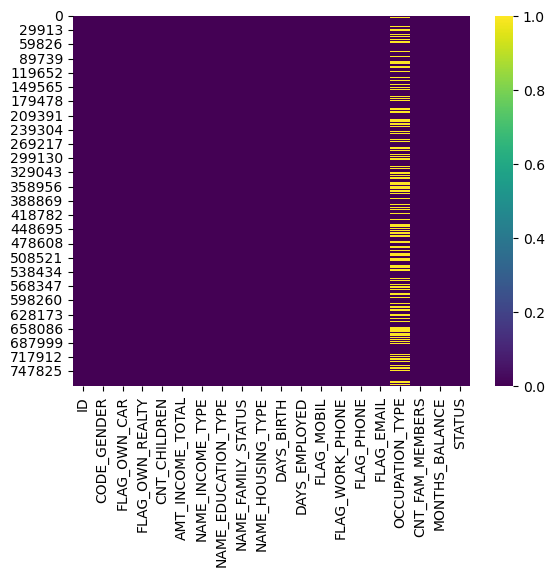

In [30]:
sns.heatmap(df[df.columns].isnull(), cmap='viridis')
plt.show()

In [31]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [32]:
percentage_of_miss()

,Number of Missing,Percentage
OCCUPATION_TYPE,240048,30.87


###### Occupation type is having 240048 data missing - now ,we will replace NAN with others

In [33]:
#filling Null Values
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')

<AxesSubplot:>

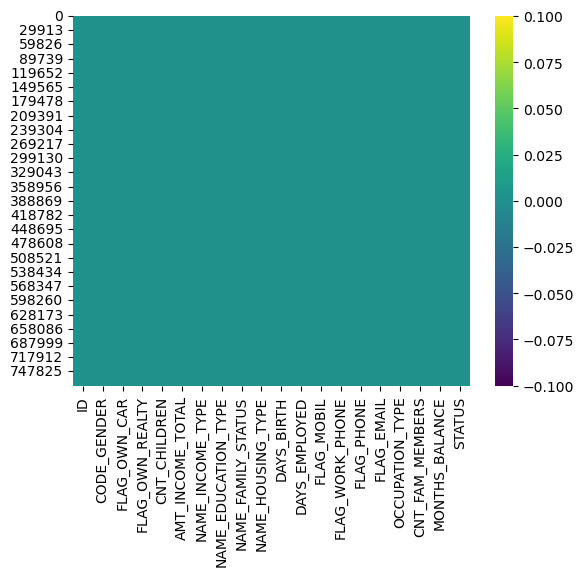

In [34]:
#cols =df.columns
sns.heatmap(df[df.columns].isnull(), cmap='viridis')

In [35]:
df.OCCUPATION_TYPE.value_counts()

others                   240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

### NUMERICAL COLUMNS IN DATASET

In [36]:
# Get numerical variables
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE'],
      dtype='object')

### CATEGORICAL COLUMN IN DATASET

In [37]:
# Get categorical variables
df_cat=df.select_dtypes(include='object')# Just get me the categorical variables
df_cat.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS'],
      dtype='object')

### UNIVARIATE ANALYSIS

##### LETS START CHECKING EACH COLUMN ONE BY ONE

##### DATA CLEANING - FIXING INVALID VALUES

##### Cleaning column ID

In [38]:
df.ID.value_counts()

5090630    61
5148524    61
5066707    61
5061848    61
5118380    61
           ..
5024557     1
5062311     1
5024365     1
5024364     1
5041568     1
Name: ID, Length: 36457, dtype: int64

In [ ]:
# Data is clean and has unique value for each customer.

#### Cleaning Column CODE_GENDER

In [39]:
df.CODE_GENDER.value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [ ]:
# Data is clean Female is more compared to Male.

#### Cleaning column FLAG_OWN_CAR

In [40]:
df.FLAG_OWN_CAR.value_counts()

N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
# Data is clean. People who own car is less compared to who doesnt own a car.

#### Cleaning column FLAG_OWN_REALTY

In [41]:
df.FLAG_OWN_REALTY.value_counts()

Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
# Data is clean - Customers having own property apply for credit card is high.

#### Cleaning Column CNT_CHILDREN

In [42]:
df.CNT_CHILDREN.value_counts()

0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

In [ ]:
# Data is Clean
# But there are outliers which we will work on.

#### Cleaning Column AMT_INCOME_TOTAL

In [43]:
df.AMT_INCOME_TOTAL.value_counts()

135000.00    90217
180000.00    68579
157500.00    62686
112500.00    61622
225000.00    61399
             ...  
51750.00         7
89550.00         5
594000.00        4
151200.00        2
134995.50        2
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64

In [ ]:
# Data is clean - This column goves the annual income of customers.

#### Cleaning Column NAME_INCOME_TYPE

In [44]:
df.NAME_INCOME_TYPE.value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
# Data is Clean -- Working people applying for credit card is high.

#### Cleaning Column NAME_EDUCATION_TYPE

In [45]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
# In the column NAME_EDUCATION_TYPE there is a value Secondary / secondary special which has symbol (/) in between and also the value may
# be value as Secondary / secondary special -- Lets clean it  and keep all the values as Secondary for better understanding.

In [46]:
def education_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]       
    return x

In [47]:
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].apply(education_type)

In [48]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64

#### Cleaning Column NAME_FAMILY_STATUS

In [49]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
#Data is clean

#### Cleaning Column NAME_HOUSING_TYPE

In [50]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
# In the column Name_housing_type there is a value House/apartment which has symbol (/) in between and also the value may
# be House or Apartment -- Lets clean it  and keep all the values as House because we have some classification of 
# apartment but not a house option so I choose House.

In [51]:
def get_apartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]       
    return x

In [52]:
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(get_apartment)

In [ ]:
df.NAME_HOUSING_TYPE.value_counts()

#### Cleaning Column DAYS_BIRTH

In [ ]:
#Getting DOB -- Changing negative values to readable date format.

In [ ]:
# Days_birth column name was transformed to Birth_day for better understanding and the negative values are replaced with 
# date using timedelta.

In [53]:
df.DAYS_BIRTH.value_counts()

-14667    1018
-15140     928
-15675     835
-15519     799
-16995     799
          ... 
-18983       1
-10119       1
-19526       1
-7489        1
-9177        1
Name: DAYS_BIRTH, Length: 7183, dtype: int64

In [54]:
def date_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

In [55]:
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(date_of_birth)

#### Cleaning Column DAYS_EMPLOYED

In [ ]:
# Getting Employed days from days_employed and transform the column as Employed_days.
# The negative values are transformed to readable date format.

In [56]:
df.DAYS_EMPLOYED.value_counts()

 365243    127972
-1751        1601
-1539        1545
-401         1498
-2531        1319
            ...  
-3294           1
-3891           1
-7049           1
-7765           1
-2848           1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

In [57]:
def day_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    #if employedDay > date.today().strftime('%Y-%m-%d') :
        #result = 0
    #else:
         #result = employedDay
    #return result
    return employedDay

In [58]:
df['DAYS_EMPLOYED']   = df['DAYS_EMPLOYED'].apply(day_employed)

In [59]:
df.DAYS_EMPLOYED.value_counts()

3023-03-14    127972
2018-05-27      1601
2018-12-25      1545
2022-02-05      1498
2016-04-07      1319
               ...  
2014-03-06         1
2012-07-17         1
2003-11-24         1
2001-12-08         1
2015-05-26         1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

In [ ]:
# The Negative values are changed to readable date format.

#### Cleaning Column FLAG_MOBIL

In [60]:
df.FLAG_MOBIL.value_counts()

1    777715
Name: FLAG_MOBIL, dtype: int64

In [ ]:
# Data is clean -- looks like every one is having the phone.

#### Cleaning Column FLAG_WORK_PHONE

In [61]:
df.FLAG_WORK_PHONE.value_counts()

0    597427
1    180288
Name: FLAG_WORK_PHONE, dtype: int64

In [ ]:
# Data is clean, People not having seperate work phone is high

#### Clean Column FLAG_PHONE

In [62]:
df.FLAG_PHONE.value_counts()

0    543650
1    234065
Name: FLAG_PHONE, dtype: int64

In [ ]:
# Data is clean Phone users are less.

#### Clean column FLAG_EMAIL

In [63]:
df.FLAG_EMAIL.value_counts()

0    706418
1     71297
Name: FLAG_EMAIL, dtype: int64

In [ ]:
# Data is clean. Customer having Email is less as per the info collected.

#### Cleaning Column OCCUPATION_TYPE

In [64]:
df.OCCUPATION_TYPE.value_counts()

others                   240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# Data is clean. we replaced missing column with Others

#### Cleaning Column CNT_FAM_MEMBERS

In [65]:
df.CNT_FAM_MEMBERS.value_counts()

2     423723
1     141477
3     134894
4      66990
5       8999
6       1196
7        273
15       111
9         46
20         6
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
# Data is clean.No missing values -- but it has outliers.

#### Cleaning Column MONTHS_BALANCE

In [ ]:
#  The month of the extracted data is the starting point with 0 is the current month, 
# -1 is the previous month, and so on

In [66]:
df.MONTHS_BALANCE.value_counts()

-1     24963
-2     24871
 0     24672
-3     24644
-4     24274
       ...  
-56     1588
-57     1253
-58      955
-59      627
-60      321
Name: MONTHS_BALANCE, Length: 61, dtype: int64

#### Cleaning column STATUS

In [ ]:
'''
0: 1-29 days past due
1: 30-59 days past due
2: 60-89 days overdue
3: 90-119 days overdue
4: 120-149 days overdue
5: Overdue or bad debts, write-offs for more than 150 days
C: paid off that month
X: No loan for the month
'X': 6, 'C' : 7
'''

In [67]:
df.STATUS.value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
# There are 2 values as X and C -- we can replace it with numerical values as 6 and 7 for X and C

In [68]:
df['STATUS'].replace({'X': 6, 'C' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [ ]:
df.STATUS.value_counts()

### FEATURE ENGINEERING

In [ ]:
# Trying to get new features or new column to our dataset to add more information to cover all possible factors for our model to get accurate result.

In [69]:
#Lets check the column names
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
# Columns'DAYS_BIRTH','DAYS_EMPLOYED' are not clear for better understanding during the analysis we are naming those columns 
# as BIRTH_DAY and EMPLOYED_DAY

In [70]:
df['BIRTH_DAY']=df['DAYS_BIRTH']
df['EMPLOYED_DAY']=df['DAYS_EMPLOYED']

In [ ]:
# The dataset has no age -- we can calculate age which might be used in our analysis.

In [71]:
def age_calculations(born):
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))   

In [72]:
df['AGE']=df['BIRTH_DAY'].apply(age_calculations)

In [ ]:
# A new column - Age has been created.

In [ ]:
# we can create a target column based on the status column.
# The customers who are delay in overdue >= 60 days are assigned as YES -RISK CUSTOMERS  and others will be named as NO -Not a Risk customers.
# The target column can be used to predict which customer can be targeted for Credit card.

In [73]:
def target_calculations(x):
    target=''
    if x in (2,3,4,5):
        target="NO" # delinquent customer - Risky
    else:
        target="YES" # punctual customer - Not Risky
    return target

In [74]:
df['TARGET'] = df['STATUS'].apply(target_calculations)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,BIRTH_DAY,EMPLOYED_DAY,AGE,TARGET
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,0,7,1990-04-30,2010-10-05,32,YES
1,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-1,7,1990-04-30,2010-10-05,32,YES
2,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-2,7,1990-04-30,2010-10-05,32,YES
3,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-3,7,1990-04-30,2010-10-05,32,YES
4,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-4,7,1990-04-30,2010-10-05,32,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-9,0,1998-01-15,2019-12-06,25,YES
777711,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-10,2,1998-01-15,2019-12-06,25,NO
777712,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-11,1,1998-01-15,2019-12-06,25,YES
777713,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-12,0,1998-01-15,2019-12-06,25,YES


In [75]:
df.TARGET.value_counts()

YES    774887
NO       2828
Name: TARGET, dtype: int64

### DROPING COLUMNS 

In [76]:
# Taking copy of original dataframe before dropping the columns
df_orginal=df.copy()
df_orginal

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,BIRTH_DAY,EMPLOYED_DAY,AGE,TARGET
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,0,7,1990-04-30,2010-10-05,32,YES
1,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-1,7,1990-04-30,2010-10-05,32,YES
2,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-2,7,1990-04-30,2010-10-05,32,YES
3,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-3,7,1990-04-30,2010-10-05,32,YES
4,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,...,0,0,others,2,-4,7,1990-04-30,2010-10-05,32,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-9,0,1998-01-15,2019-12-06,25,YES
777711,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-10,2,1998-01-15,2019-12-06,25,NO
777712,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-11,1,1998-01-15,2019-12-06,25,YES
777713,5150337,M,N,Y,0,112500.00,Working,Secondary,Single / not married,Rented apartment,...,0,0,Laborers,1,-12,0,1998-01-15,2019-12-06,25,YES


In [ ]:
    df.columns

In [77]:
df = df.drop(['ID',
              'DAYS_BIRTH',
              'DAYS_EMPLOYED',
              'BIRTH_DAY',
              'FLAG_WORK_PHONE',
              'FLAG_EMAIL',
              'EMPLOYED_DAY',
              'FLAG_MOBIL'
             ],axis=1)

In [78]:
#checking the shape of the column
df.shape

(777715, 16)

### BIVARIATE ANALYSIS

### DATA VISUALIZATION

In [ ]:
# we will analyse and visualize each part of data to be in near step from our goal then passed on models.
# we will sense best factor that affect on our business goal

In [79]:
def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

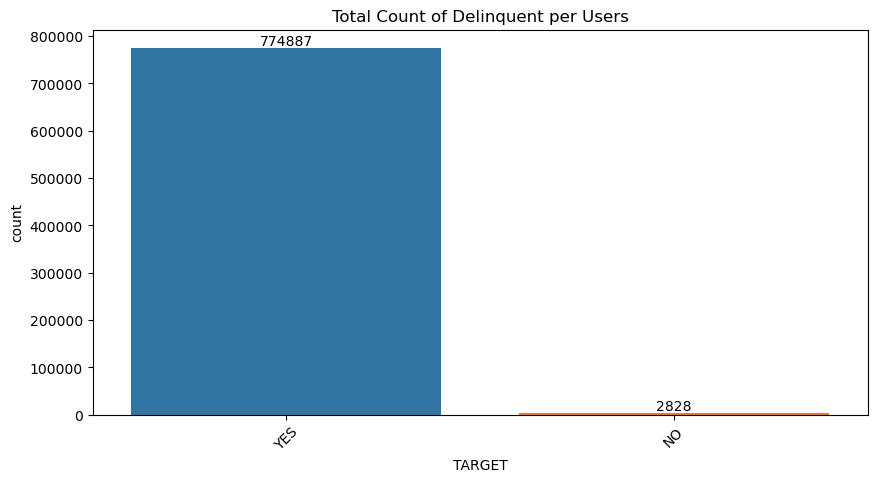

In [80]:
categorical_plotting(df,'TARGET','Total Count of Delinquent per Users')

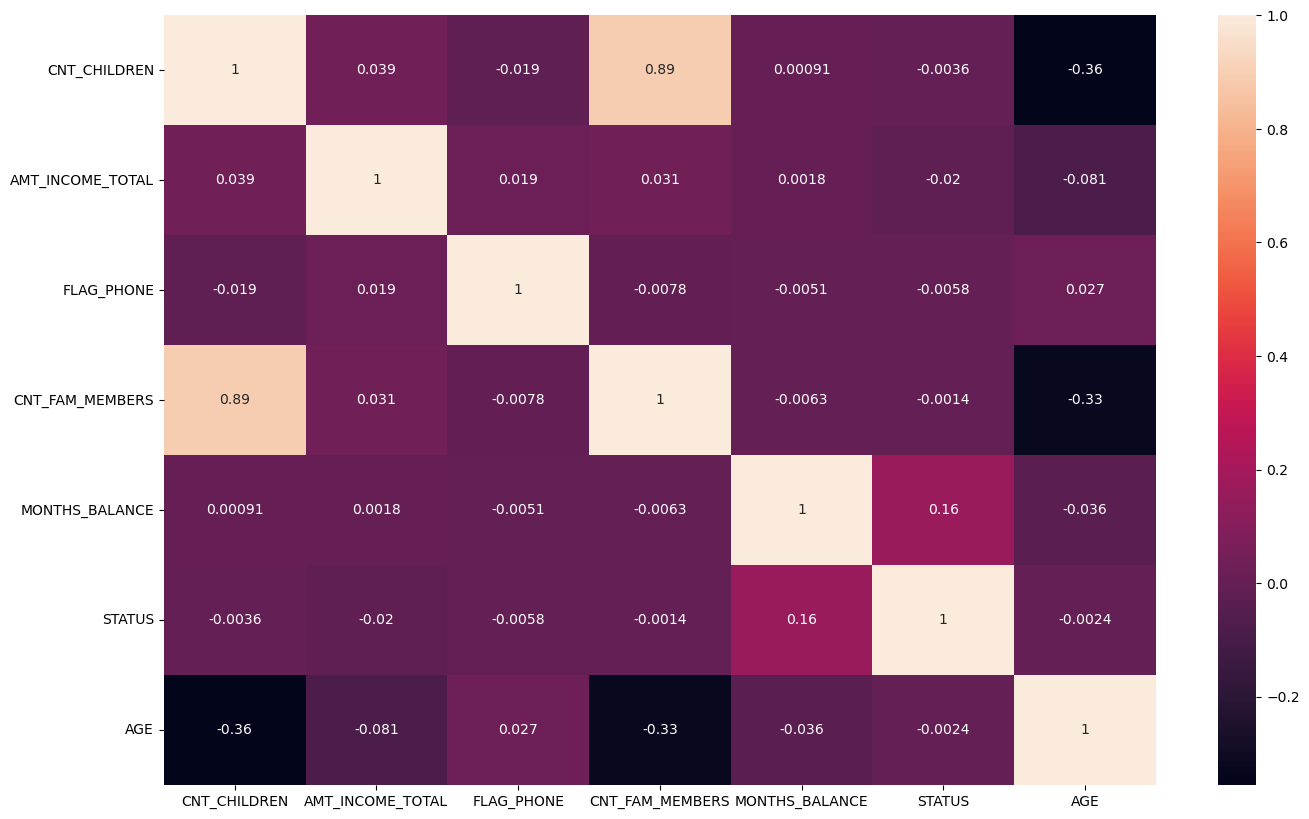

In [81]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

- 1) Strong Relationship Correlation between CNT_CHILDREN and CNT_FAM_MEMBERS

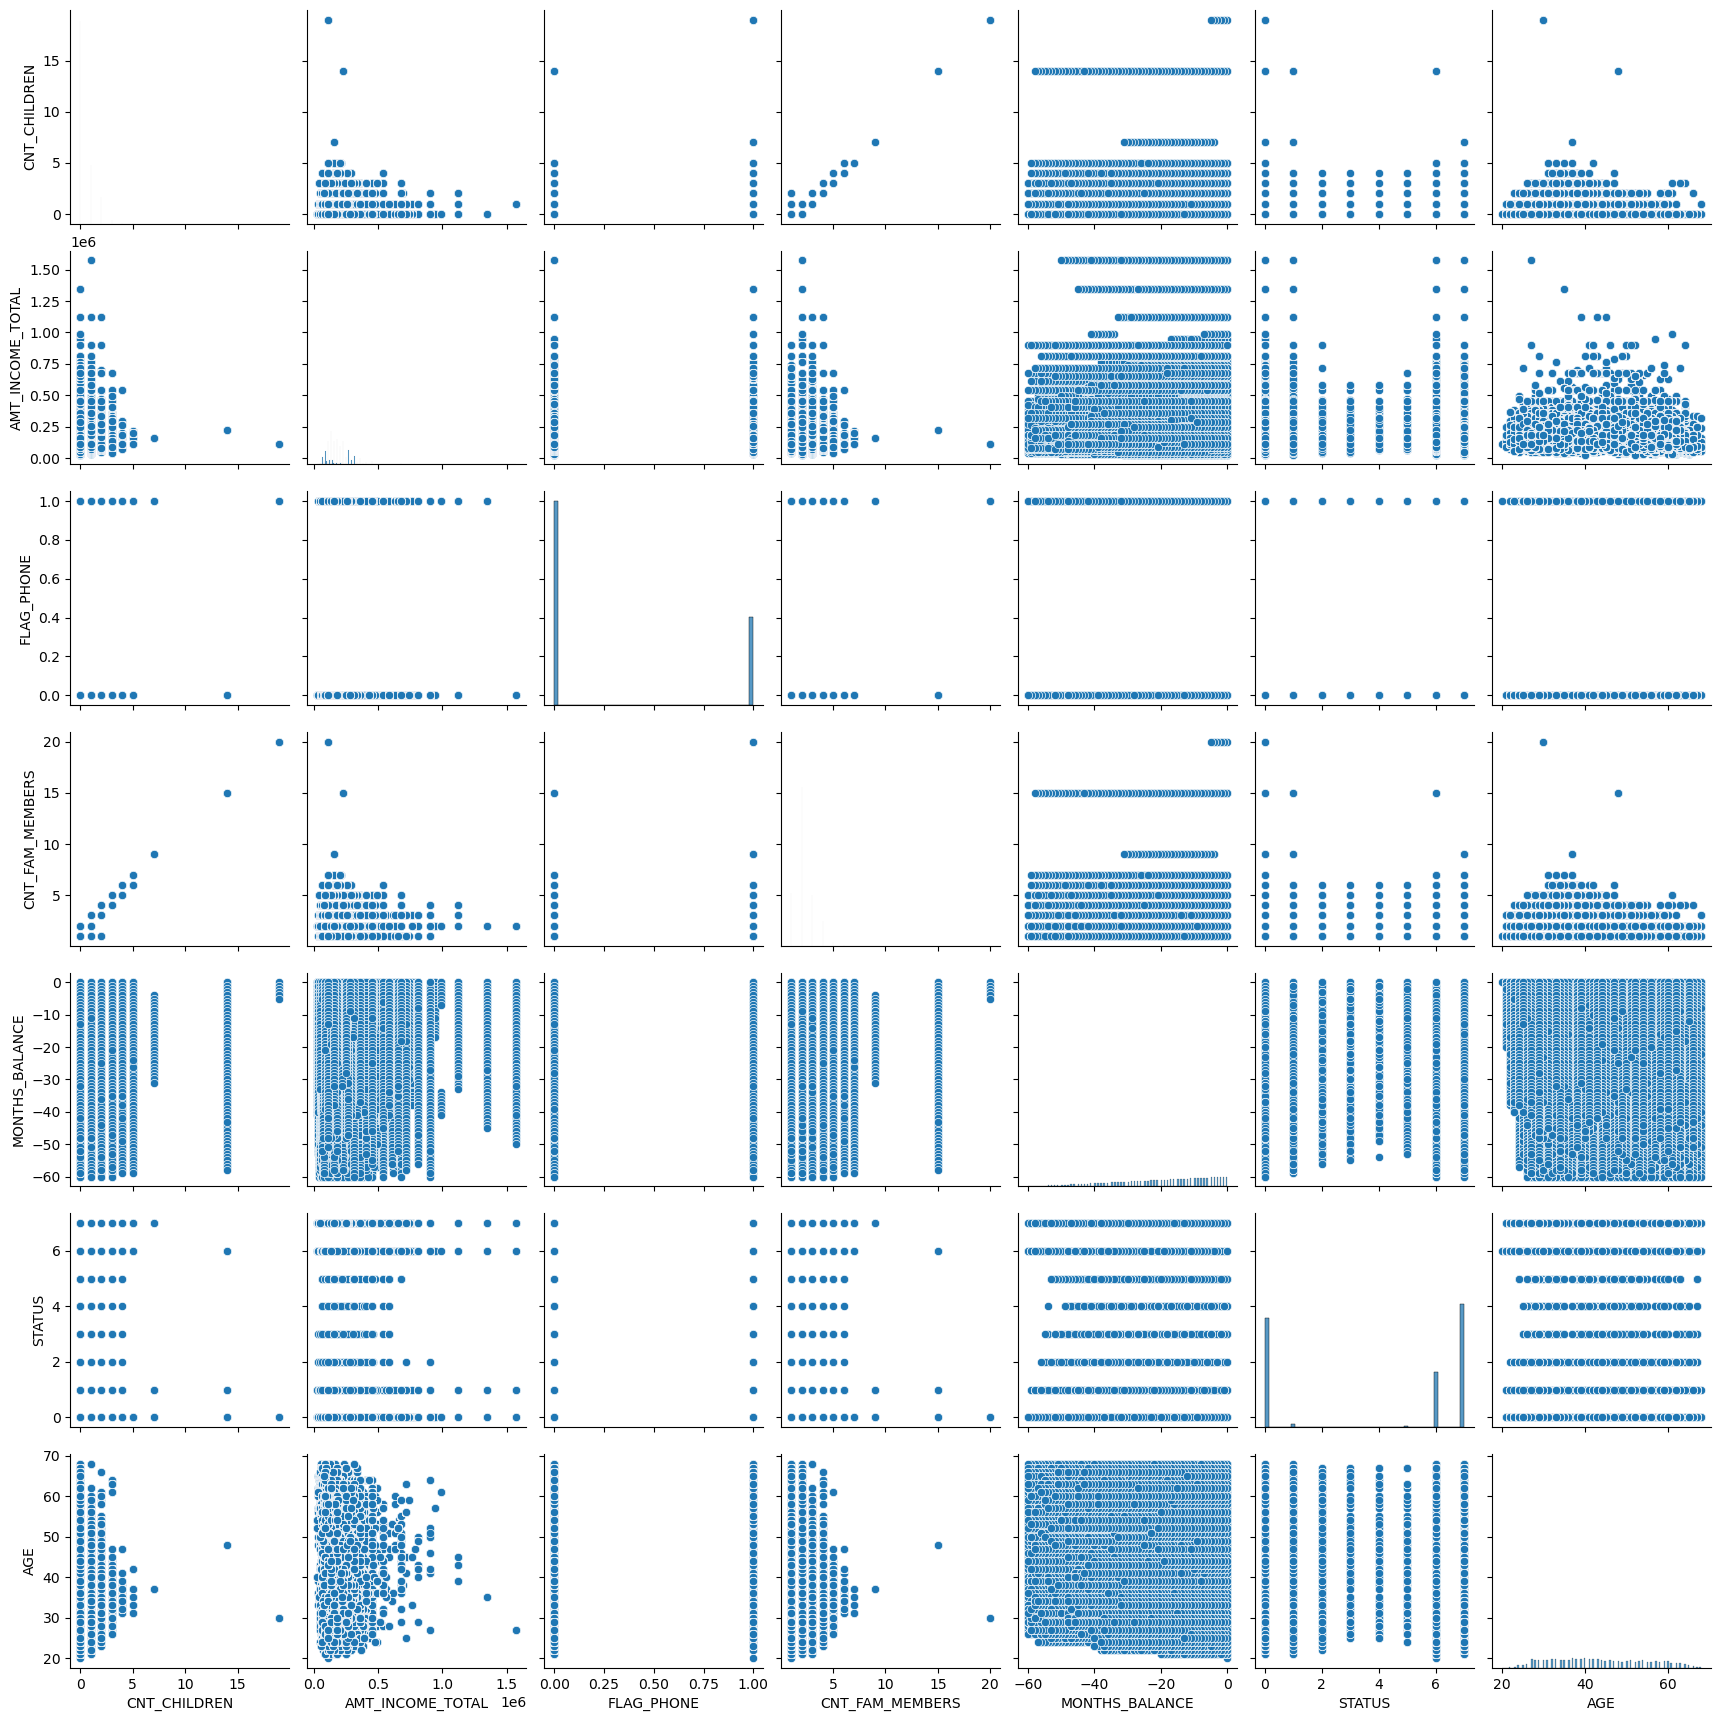

In [82]:
sns.pairplot(data=df)

In [83]:
#get all numerical column 
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'STATUS',
 'AGE']

### Visualizing CNT_CHILDERN

In [84]:
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=10)
    #plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    #plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    #plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


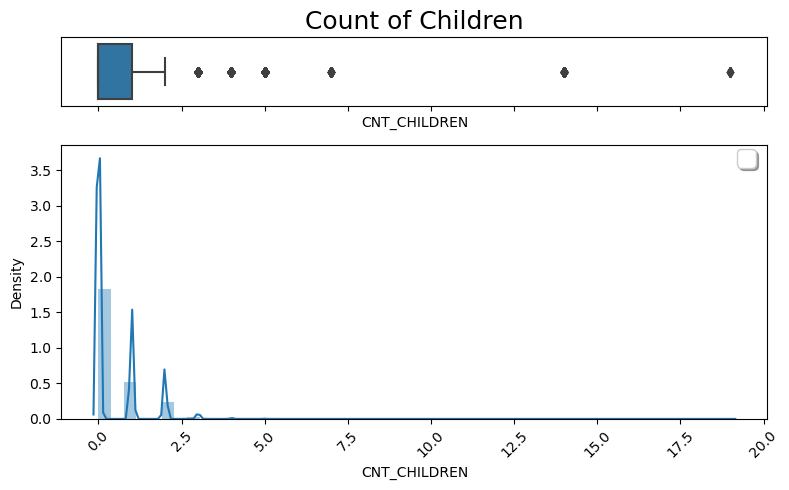

In [85]:
numerical_plotting(df,'CNT_CHILDREN','Count of Children',' ')

In [ ]:
# There are outliers in the column

#### TREATING OUTLIERS

In [86]:
def outlier_detection(dftemp,var):
    sns.boxplot(x=df[var])
    mean1=df[var].mean()
    std1=df[var].std()
    Min1=mean1-3*std1
    Max1=mean1+3*std1
    print("Mean - 3 * standard deviation:",Min1,"\nMean + 3 * standard deviation:",Max1)
    if ((max(dftemp[var]) <Max1)& (min(dftemp[var])>Min1)):
        print("\nThere is no outlier in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    else: print("\nThere are some outliers in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    return dftemp[var].describe()

Mean - 3 * standard deviation: -1.8091833482788853 
Mean + 3 * standard deviation: 2.665347881559071

There are some outliers in 'CNT_CHILDREN' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   777715.00
mean         0.43
std          0.75
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64

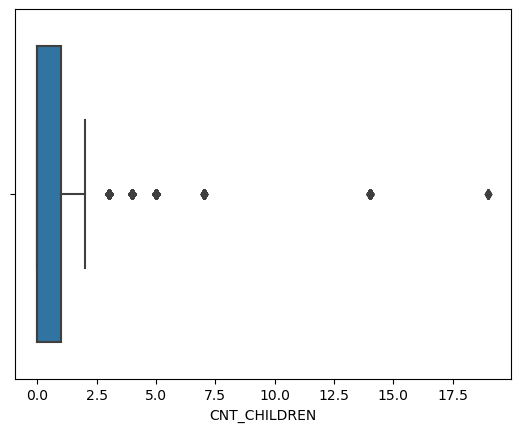

In [87]:
outlier_detection(df,'CNT_CHILDREN')

In [88]:
#I want to replace values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25) # finding 1st quartile(lowe quartile)
    Q3=df[col].quantile(0.75) # finding 3rd quartile(upper quartile)
    IQR=Q3-Q1 #calculating Inter Quartile Range
    UOF1=Q3+3*(IQR)#UOF=upper outer fence
    LOF1=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create an ematy list to append value to it
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF1:   
            Clean_col.append(LOF1)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF1 :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF1)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print(f'Number of outliers that they are less than lower outer fence({LOF1}): ',i,f'\nNumber of outliers that they are bigger than upper outer fence ({UOF1}) : ',j)
    return df[col] .describe()

Number of outliers that they are less than lower outer fence(-3.0):  0 
Number of outliers that they are bigger than upper outer fence (4.0) :  487


count   777715.00
mean         0.43
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          4.00
Name: CNT_CHILDREN, dtype: float64

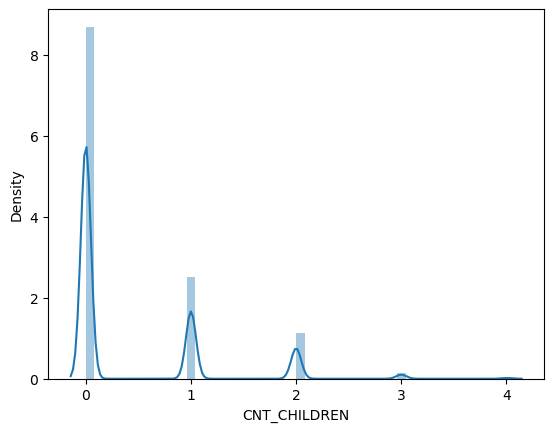

In [89]:
fixing_outliers('CNT_CHILDREN')

In [90]:
df['CNT_CHILDREN'].describe()

count   777715.00
mean         0.43
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          4.00
Name: CNT_CHILDREN, dtype: float64

#### Compare the CNT_CHILDREN with the Target column¶

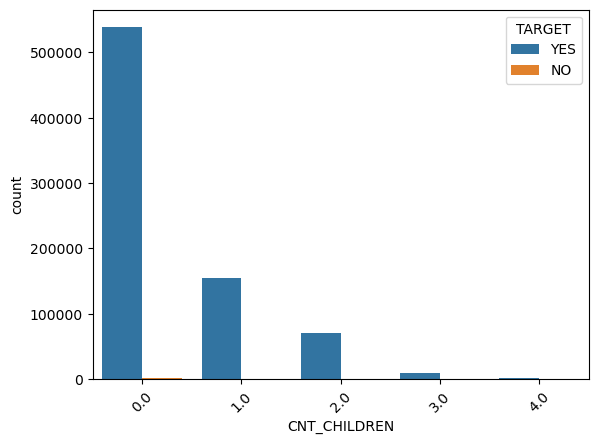

In [91]:
sns.countplot(x='CNT_CHILDREN',data=df,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

NOTES:
- 1) 70% users are single persons.

#### Visualizing AMT_INCOME_TOTAL

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


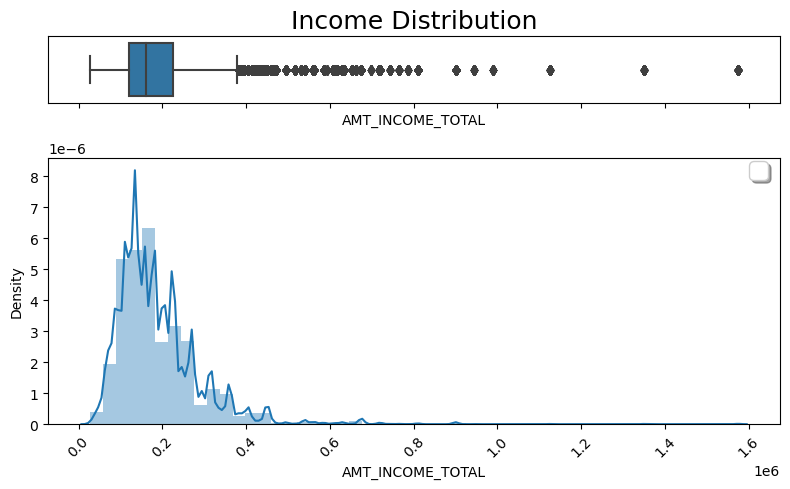

In [92]:
numerical_plotting(df,'AMT_INCOME_TOTAL','Income Distribution',' $')

In [93]:
# #what is 5 high total income  ?
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending=False).head(5)

135000.00    90217
180000.00    68579
157500.00    62686
112500.00    61622
225000.00    61399
Name: AMT_INCOME_TOTAL, dtype: int64

In [94]:
# what is the total income with the target ?
df.groupby(['AMT_INCOME_TOTAL']).max()[['TARGET']].sort_values(by ='AMT_INCOME_TOTAL',ascending=False).head(5)

,TARGET
AMT_INCOME_TOTAL,
1575000.00,YES
1350000.00,YES
1125000.00,YES
990000.00,YES
945000.00,YES


NOTES:
- 1) Total income highly repeated is $135000.

In [ ]:
numCol

#### Visualizing CNT_FAM_MEMBERS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


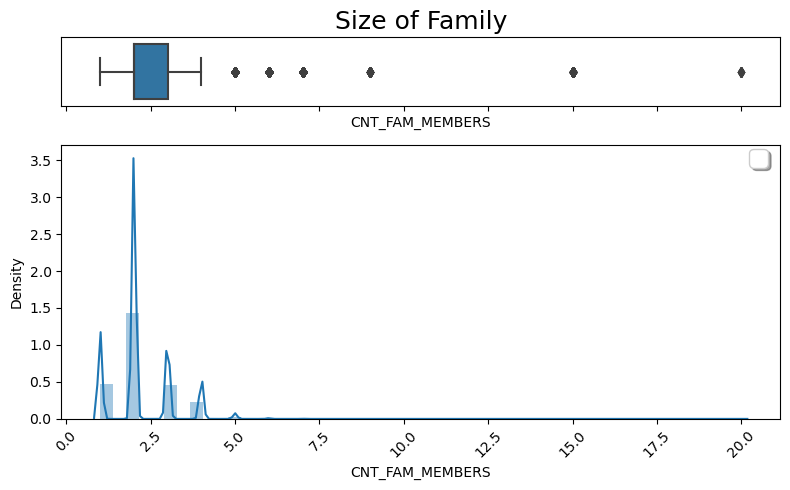

In [95]:
numerical_plotting(df,'CNT_FAM_MEMBERS','Size of Family','')

In [ ]:
# This column has Outliers.Lets treat the outliers

#### TREATING OUTLIERS

Mean - 3 * standard deviation: -0.5133017431224771 
Mean + 3 * standard deviation: 4.9309765983072165

There are some outliers in 'CNT_FAM_MEMBERS' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   777715.00
mean         2.21
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

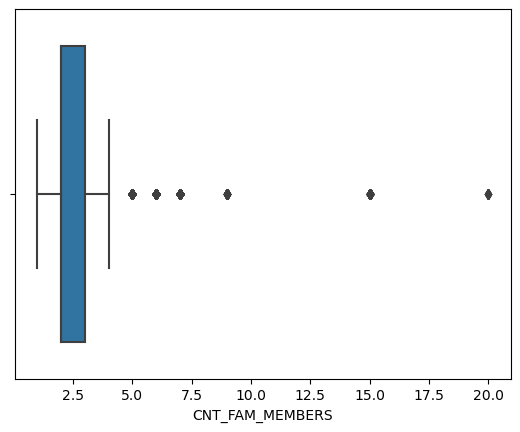

In [96]:
outlier_detection(df,'CNT_FAM_MEMBERS')

Number of outliers that they are less than lower outer fence(-1.0):  0 
Number of outliers that they are bigger than upper outer fence (6.0) :  436


count   777715.00
mean         2.21
std          0.89
min          1.00
25%          2.00
50%          2.00
75%          3.00
max          6.00
Name: CNT_FAM_MEMBERS, dtype: float64

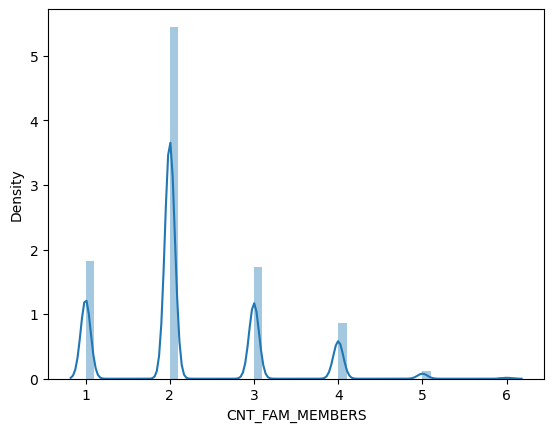

In [97]:
fixing_outliers('CNT_FAM_MEMBERS')

In [98]:
df['CNT_FAM_MEMBERS'].describe()

count   777715.00
mean         2.21
std          0.89
min          1.00
25%          2.00
50%          2.00
75%          3.00
max          6.00
Name: CNT_FAM_MEMBERS, dtype: float64

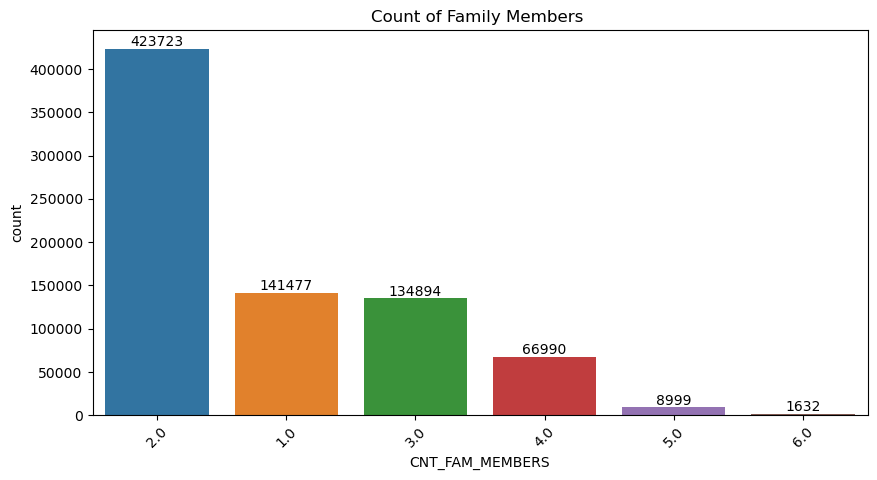

In [99]:
categorical_plotting(df,'CNT_FAM_MEMBERS','Count of Family Members ')

##### COMPARE CNT_FAM_MEMBERS with AMT_INCOME_TOTAL

In [100]:
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

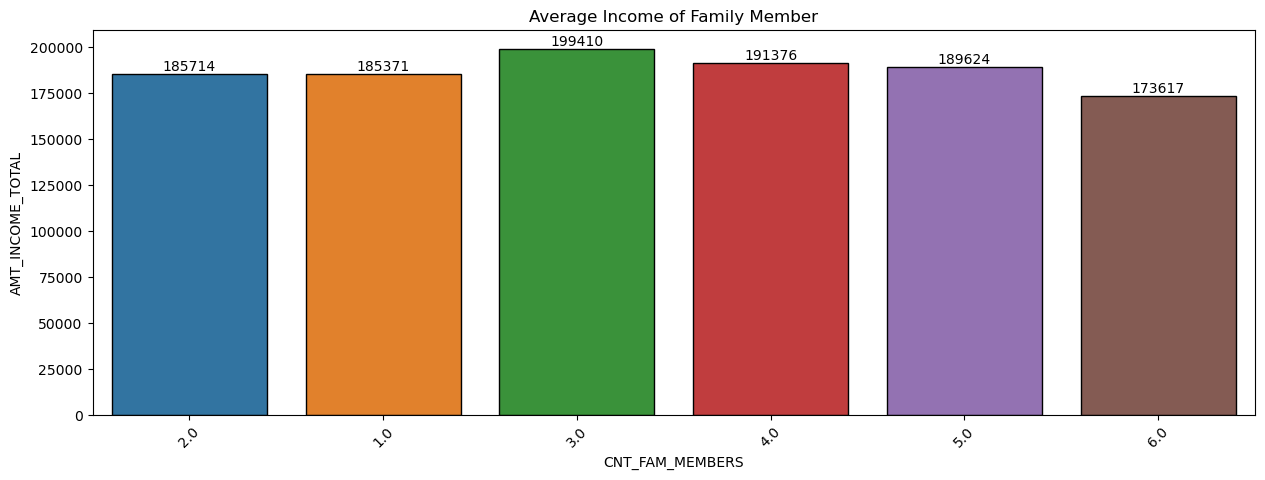

In [101]:
average_plotting(df,'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL',15,'Average Income of Family Member')

#### NOTES:
- 1) There are +ve correlation between CNT_CHILDREN and CNT_FAM_MEMBERS
- 2) Average Income of the Family Members is High for 3 members per family followed by 4 per family.
- 3) Average Income of Family Size 2 , 1 and 5 are arounf same with slight difference.
- 4) The Family Size 6 is comparitevely low when compared to other family size.

#### Visualizing STATUS

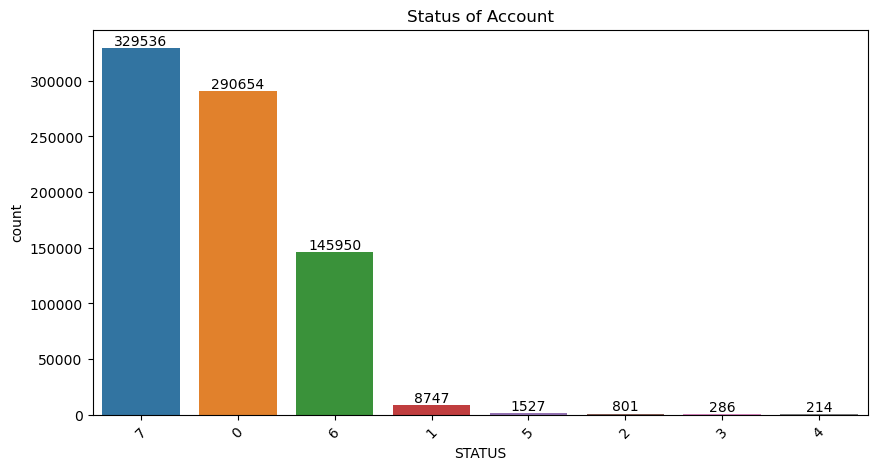

In [102]:
categorical_plotting(df,'STATUS','Status of Account')

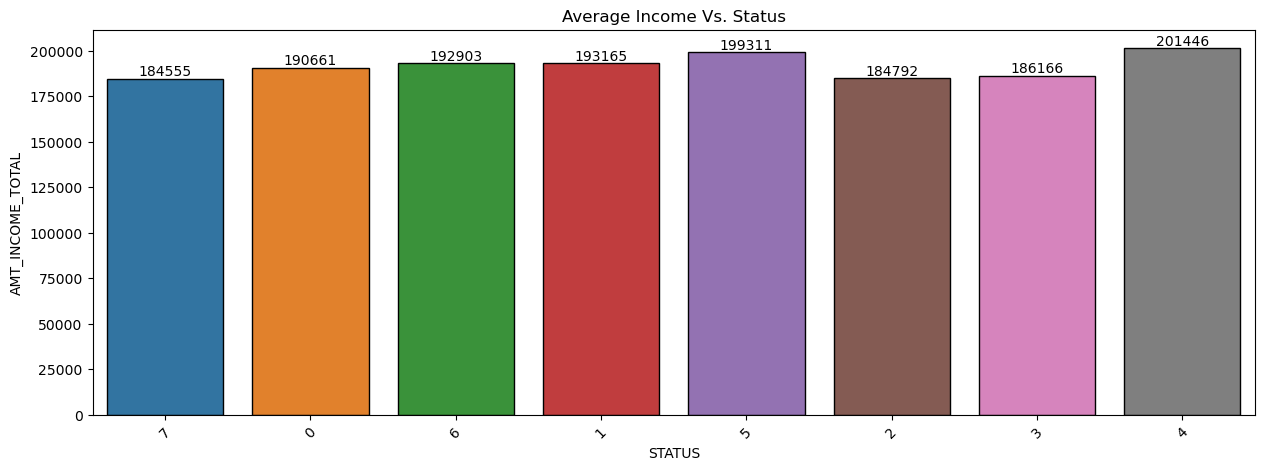

In [103]:
average_plotting(df,'STATUS','AMT_INCOME_TOTAL',15,'Average Income Vs. Status')

In [ ]:
'''
0: 1-29 days past due
1: 30-59 days past due
2: 60-89 days overdue
3: 90-119 days overdue
4: 120-149 days overdue
5: Overdue or bad debts, write-offs for more than 150 days
C: paid off that month
X: No loan for the month
'X': 6, 'C' : 7
'''


#### NOTES
- 1) Customers whose overdue is 5 is very high which is status 4.
- 2) Category 5 is second highest where the overdue debts are assigned to credit department.
- 3) Category 6 have no loan for the month.


### VISUALIZING AGE

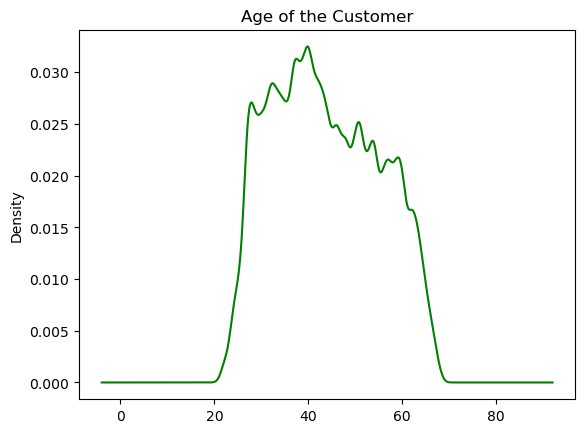

In [104]:
df.AGE.plot.density(color='green')
plt.title('Age of the Customer')
plt.show()

NOTES:
- 1) Age has no outliers.
- 2) Customers in age range from 30- 40 applying for Credit card is high.


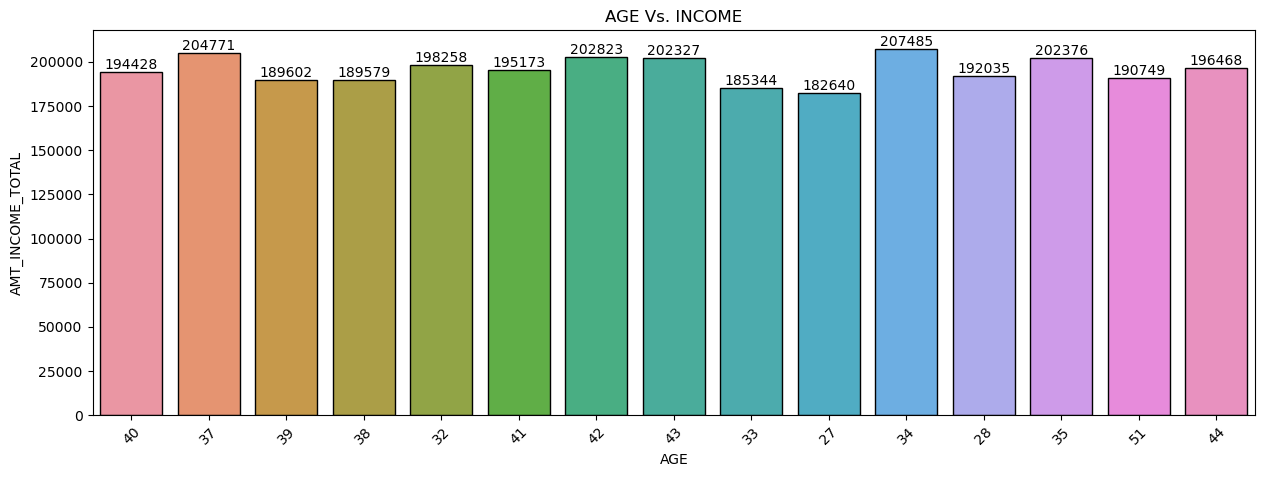

In [105]:
average_plotting(df,'AGE','AMT_INCOME_TOTAL',15,'AGE Vs. INCOME')

NOTES
- 1) Average Salary is high for the age 34 followed by 35,32.
- 2) Average Salary of customers on 40's is also high compared to age in 20's

### CATEGORICAL VARIABLE

In [106]:
catCols = [col for col in df.columns if df[col].dtype=="O"]
catCols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'TARGET']

#### Visualizing CODE_GENDER Column

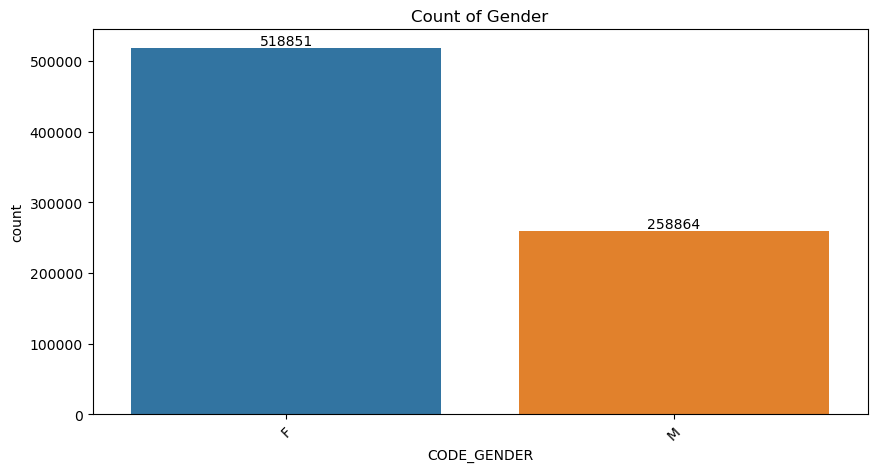

In [107]:
categorical_plotting(df,'CODE_GENDER','Count of Gender')

In [108]:
pd.options.display.float_format = "{:.2f}".format
df.groupby('CODE_GENDER').mean()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(5).T

CODE_GENDER,M,F
AMT_INCOME_TOTAL,217868.58,173899.66


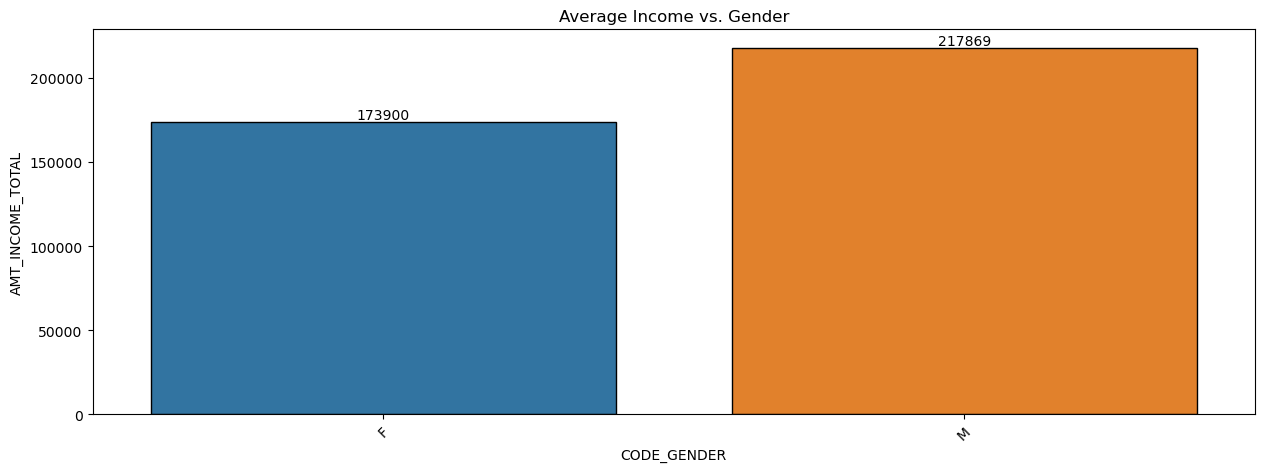

In [109]:
average_plotting(df,'CODE_GENDER','AMT_INCOME_TOTAL',15,'Average Income vs. Gender')

#### NOTES
- 1) Average Income of Female is 172580 whereas Male is 214989
- 2) 66% of users are female.
- 3) Male user income is high when compared to Female users.

#### Visualizing FLAG_OWN_CAR Column

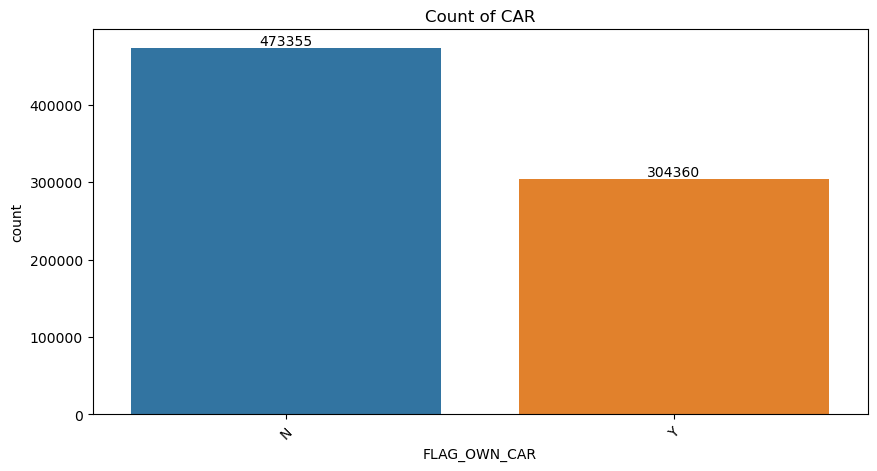

In [110]:
categorical_plotting(df,'FLAG_OWN_CAR','Count of CAR')

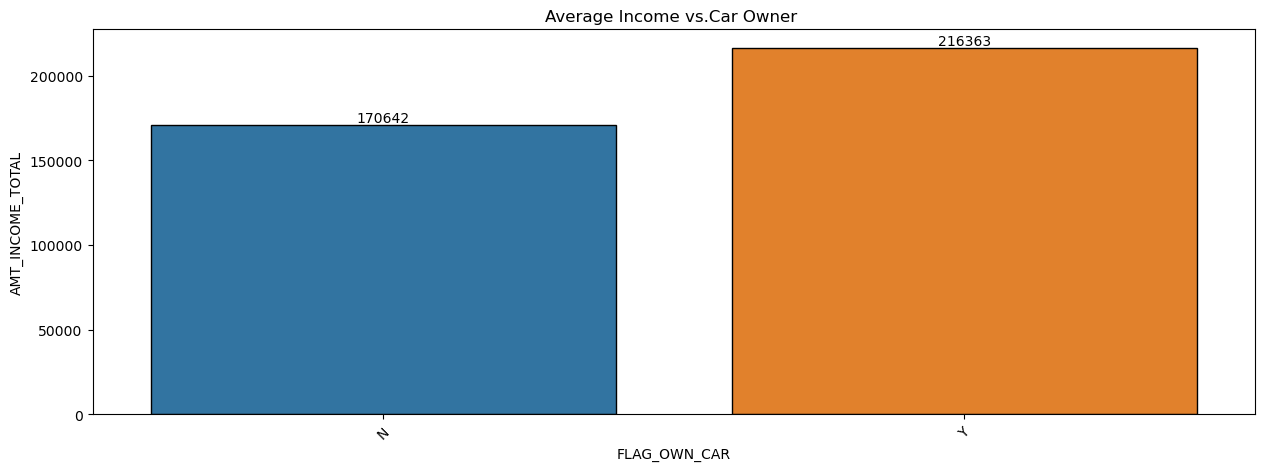

In [111]:
average_plotting(df,'FLAG_OWN_CAR','AMT_INCOME_TOTAL',15,'Average Income vs.Car Owner ')

#### NOTES
- 1) 40% of Users  has car

#### Visualize FLAG_OWN_REALTY Column

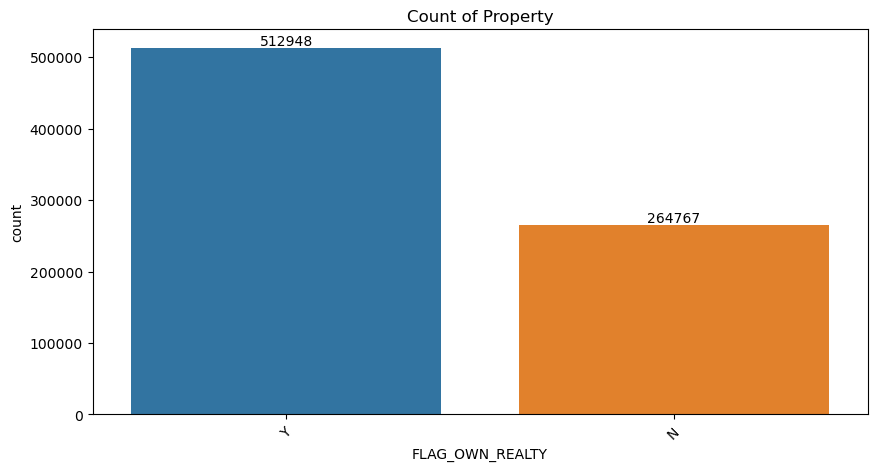

In [113]:
categorical_plotting(df,'FLAG_OWN_REALTY','Count of Property')

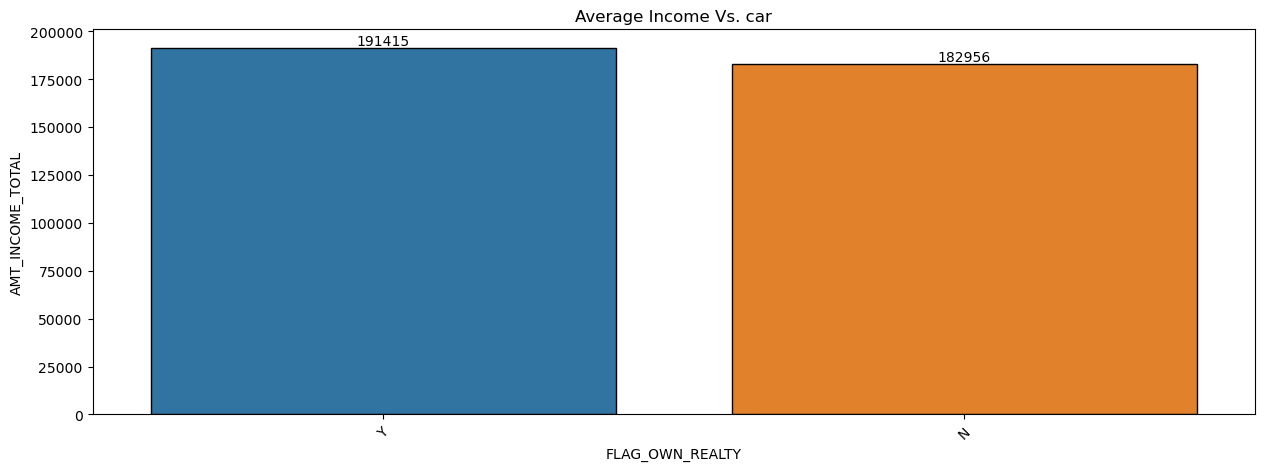

In [114]:
average_plotting(df,'FLAG_OWN_REALTY','AMT_INCOME_TOTAL',15,'Average Income Vs. car')

#### Notes
- 1) 65% users has Property

#### Visualize NAME_INCOME_TYPE Column

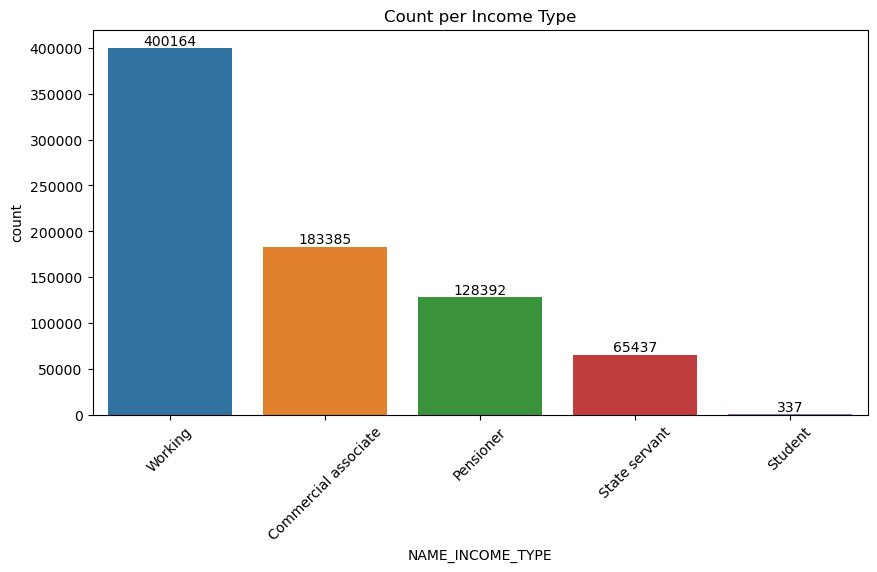

In [115]:
categorical_plotting(df,'NAME_INCOME_TYPE','Count per Income Type')

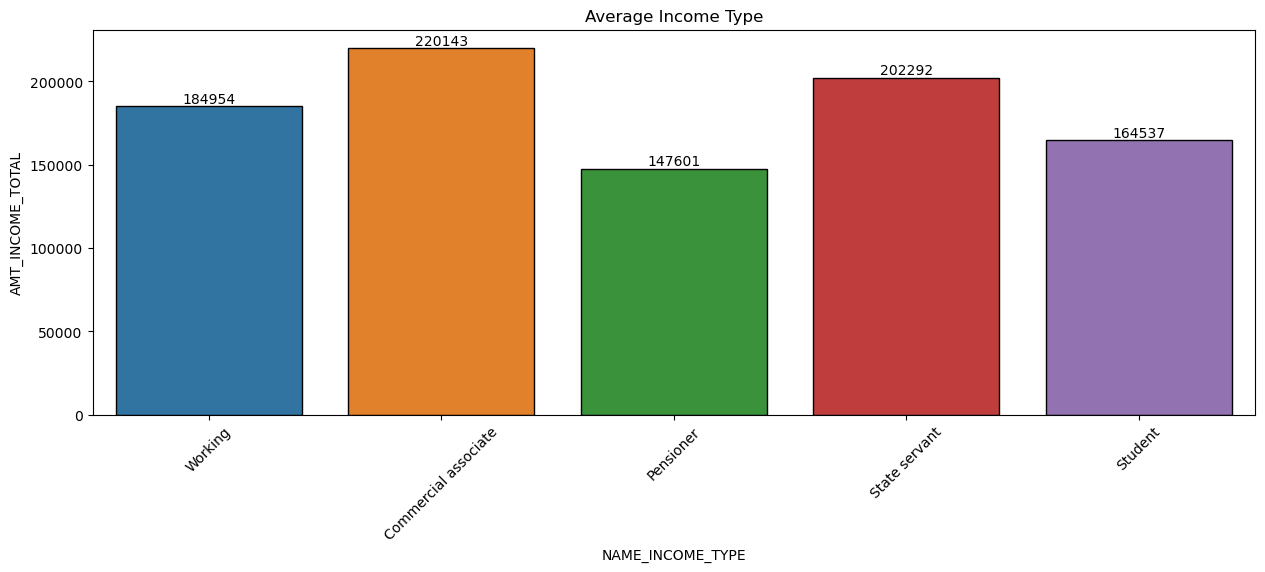

In [116]:
average_plotting(df,'NAME_INCOME_TYPE','AMT_INCOME_TOTAL',15,'Average Income Type')

#### Notes
- 1) 50% users is working.
- 2) Commerical Associate have high Average Income

#### Viualization NAME_EDUCATION_TYPE Columns

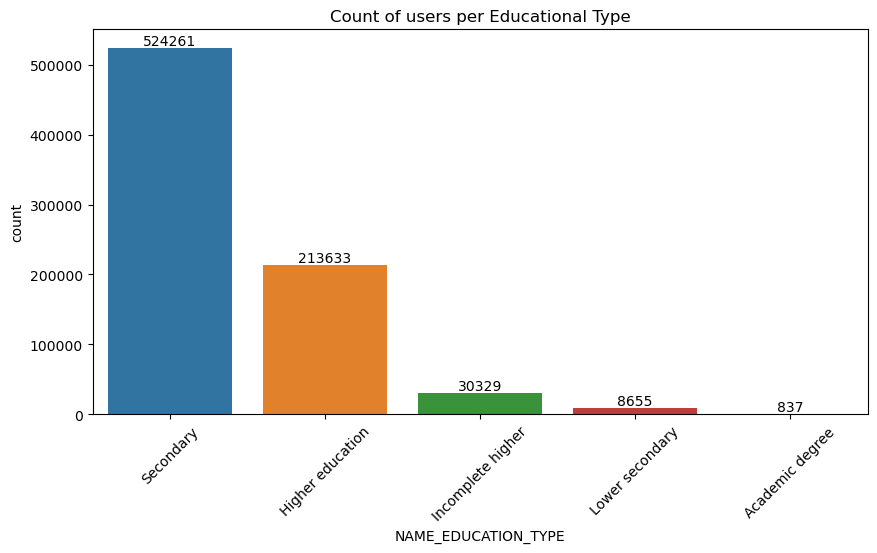

In [117]:
categorical_plotting(df,'NAME_EDUCATION_TYPE','Count of users per Educational Type')

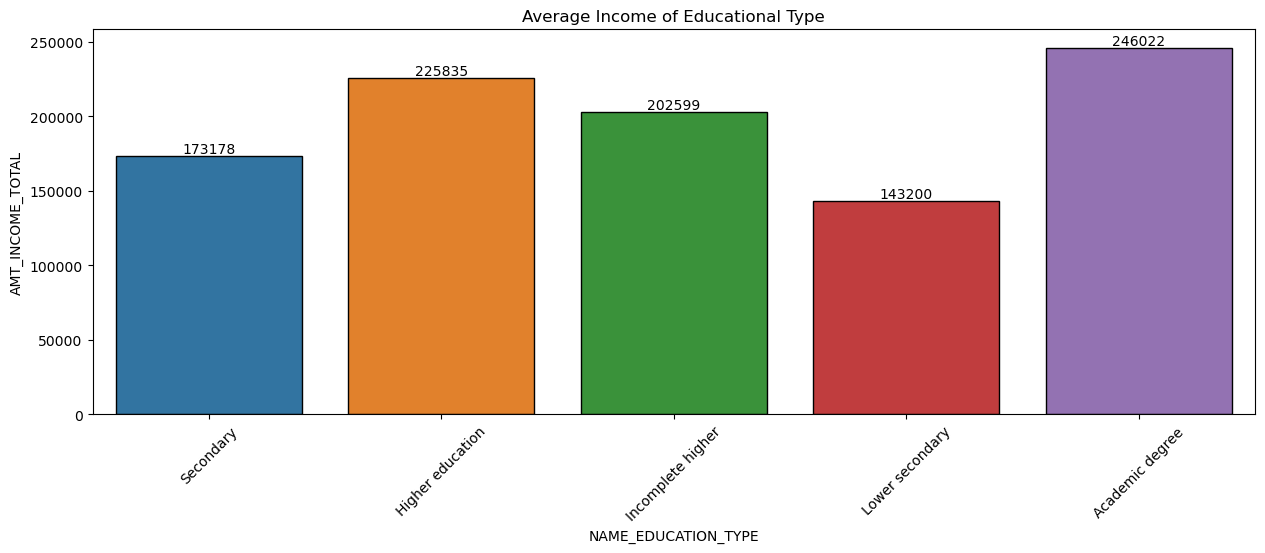

In [118]:
average_plotting(df,'NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL',15,'Average Income of Educational Type')

#### Notes
- 1) 67% users is secondary level.
- 2) Higher Education and Academic degree has Maximum Income

#### Visulaize NAME_FAMILY_STATUS Column

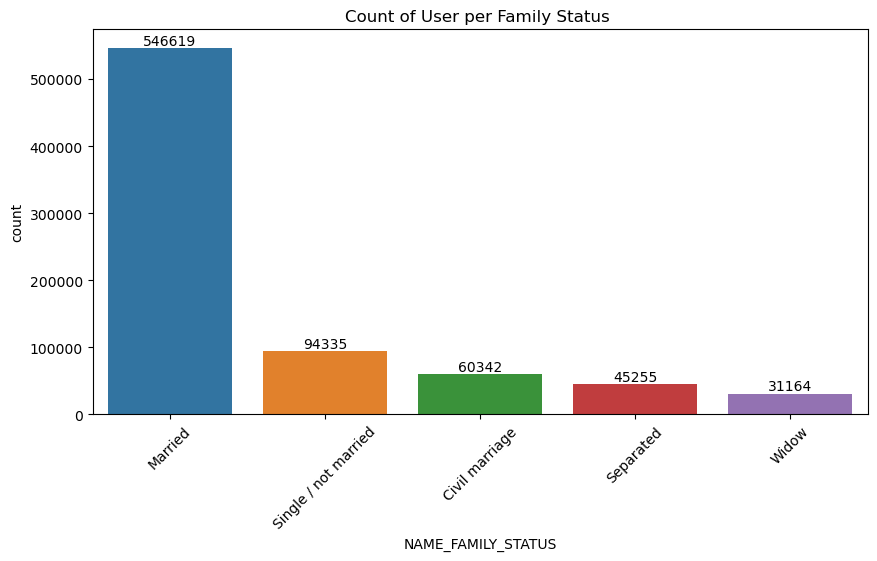

In [119]:
categorical_plotting(df,'NAME_FAMILY_STATUS','Count of User per Family Status ')

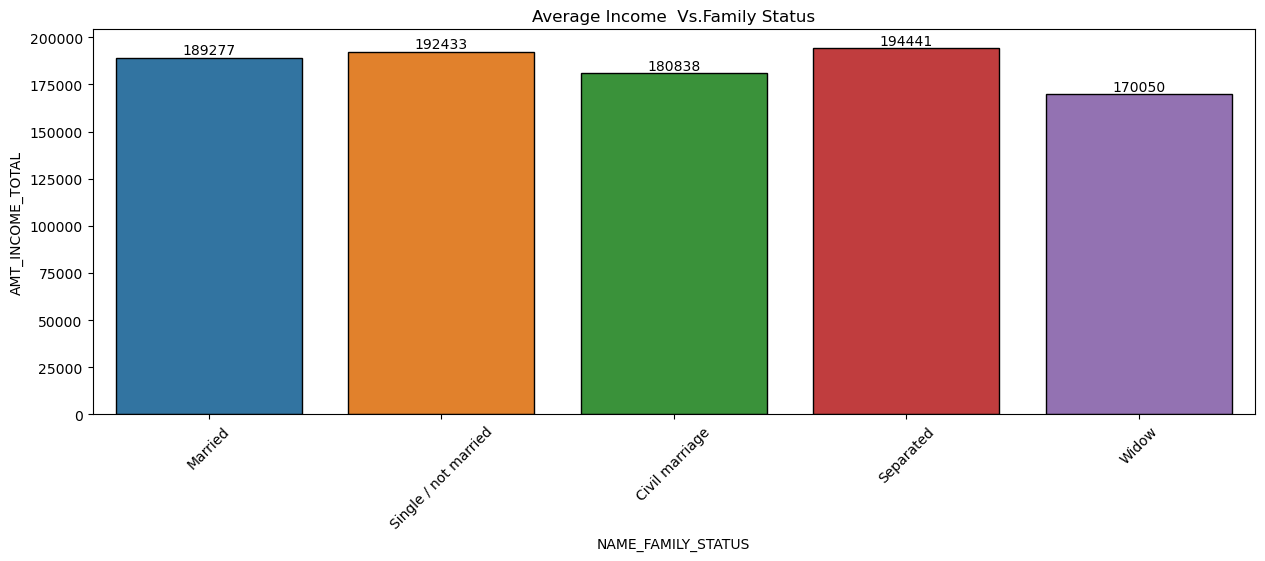

In [120]:
average_plotting(df,'NAME_FAMILY_STATUS','AMT_INCOME_TOTAL',15,'Average Income  Vs.Family Status')

#### Notes:
- 1) 70% of users are married.
- 2) Single/ not married  has high Income

#### Visualize NAME_HOUSING_TYPE Column

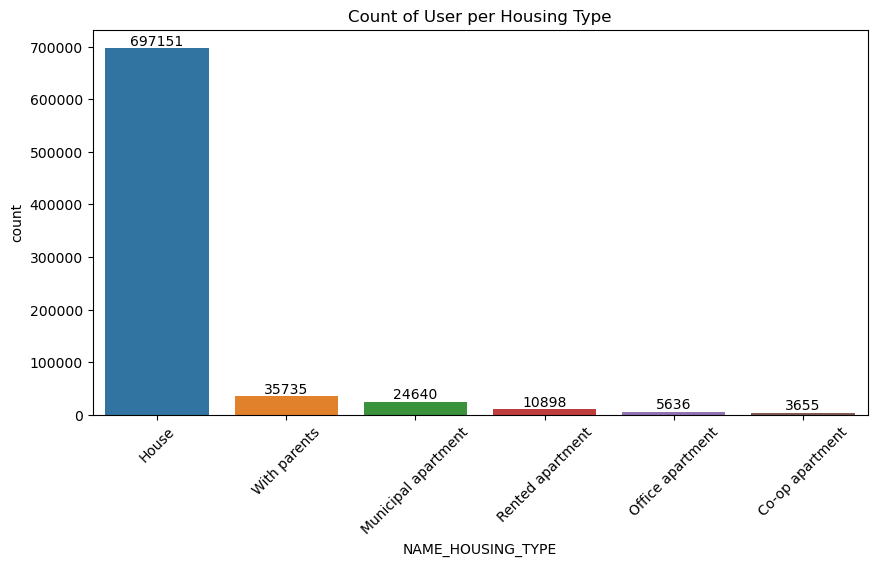

In [121]:
categorical_plotting(df,'NAME_HOUSING_TYPE','Count of User per Housing Type')

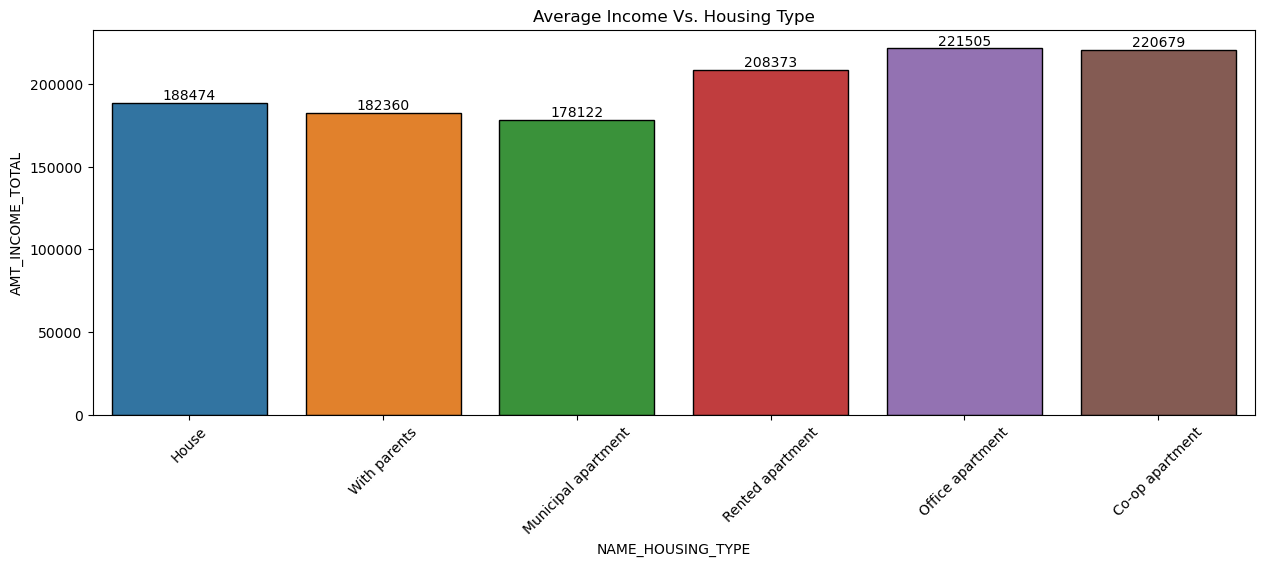

In [122]:
average_plotting(df,'NAME_HOUSING_TYPE','AMT_INCOME_TOTAL',15,'Average Income Vs. Housing Type')

#### Notes
- 1) 90% of the users are House Owners.
- 2) Average Income of Office Apartment is comparitevely high.

#### Visualizing OCCUPATION_TYPE Column

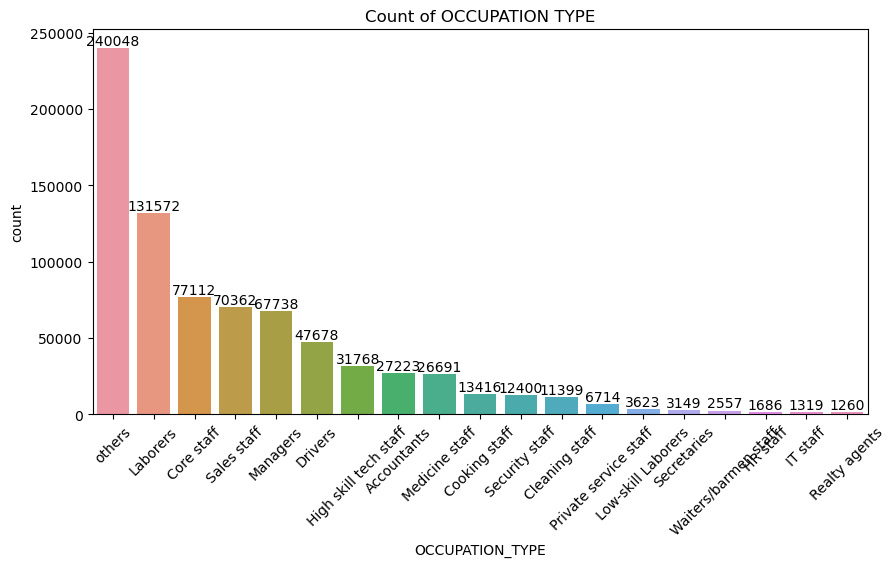

In [123]:
categorical_plotting(df,'OCCUPATION_TYPE','Count of OCCUPATION TYPE')

#### Visualize TARGET column 

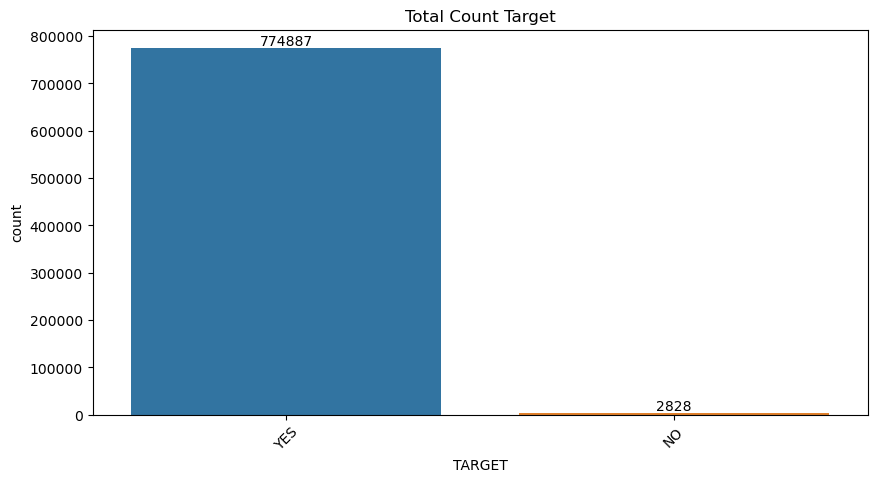

In [124]:
categorical_plotting(df,'TARGET','Total Count Target')

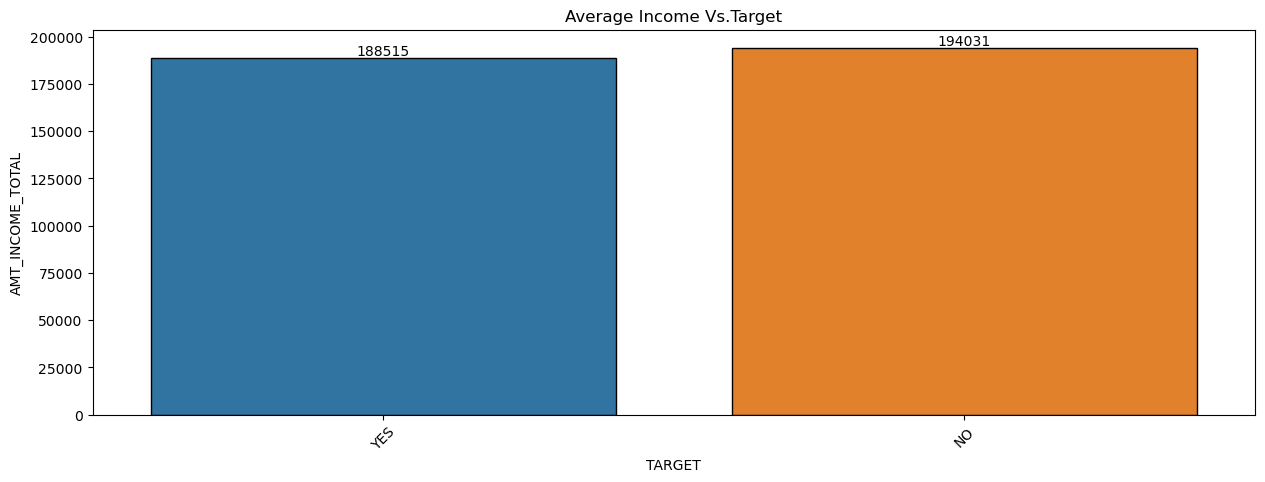

In [125]:
average_plotting(df,'TARGET','AMT_INCOME_TOTAL',15,'Average Income Vs.Target')

#### Notes.
- 1) 99% of users is not approved for credit card due to Deliquent Account Status.

#### From the above result of categorical data analysis data is Unbalanced.I will balance the data to enhance our model to prevent overfitting.

#### INFERENCE:
 - 1) CODE_GENDER column has Unbalanced Data
 - 2) FLAG_OWN_CAR column has Unbalanced Data
 - 3) FLAG_OWN_REALTY column has Unbalanced Data
 - 4) NAME_INCOME_TYPE column has Unbalanced Data
 - 5) NAME_EDUCATION_TYPE column has Unbalanced Data
 - 6) NAME_FAMILY_STATUS column has Unbalanced Data
 - 7) NAME_HOUSING_TYPE column has Unbalanced Data
 - 8) TARGET column has Unbalanced Data

### DATA PREPROCESSING

In [126]:
column_data = ["TARGET","CODE_GENDER","CNT_FAM_MEMBERS","FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",'AGE']
for col in column_data:
    label=LabelEncoder()
    df[col] = label.fit_transform(df[col].values)

In [127]:
df = pd.get_dummies(df, drop_first=True, columns=['OCCUPATION_TYPE'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_others
0,1,1,1,0.00,427500.00,4,1,0,4,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0.00,427500.00,4,1,0,4,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0.00,427500.00,4,1,0,4,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0.00,427500.00,4,1,0,4,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0.00,427500.00,4,1,0,4,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
df.shape

(777715, 33)

### DATA PREPARATION & SPLITING

In [129]:
X = df.drop(['TARGET'], axis=True)
y = df['TARGET']
#print(x)
#print(y)

### DATA STANDARDIZE

In [131]:
sc=StandardScaler()
x_scaled = sc.fit_transform(X)

### DATA BALANCING

Class=0, n=2828 (50.000%)
Class=1, n=2828 (50.000%)


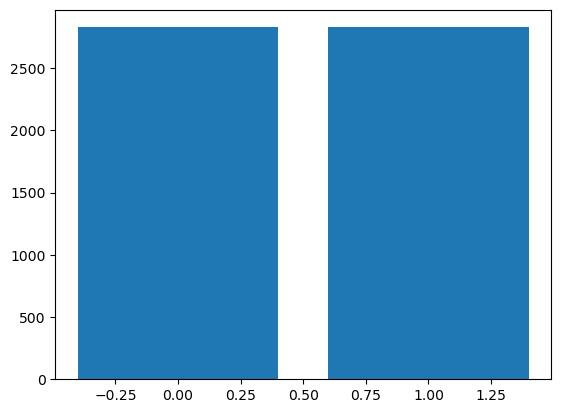

In [133]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(random_state=0)
X, y = undersample.fit_resample(x_scaled, y)
 #summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### SPLITTING THE DATA

In [135]:
x_train ,x_test ,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0,stratify=y)

In [136]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1132, 32)
(1132,)
(4524, 32)
(4524,)


### LOGISTIC REGRESSION

In [137]:
from sklearn.linear_model import LogisticRegression
#perform Logitic  Regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [138]:
#perform prediction using test data
y_pred = log_reg.predict(x_test)
#y_pred_train = log_reg.predict(x_train)

In [139]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Percision using LG on test Data: {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall using LG on test Data: {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))
print("Accuracy using LG  on test Data: {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))

Percision using LG on test Data: 60.30 %
Recall using LG on test Data: 64.13 %
Accuracy using LG  on test Data: 60.95 %


In [140]:
#Display Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[327, 239],
       [203, 363]], dtype=int64)

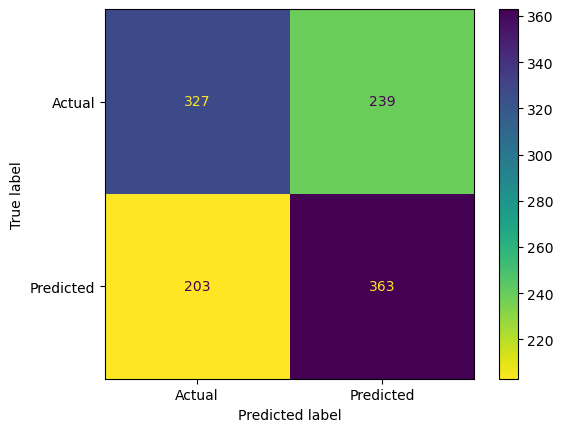

In [141]:
#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(log_reg, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [142]:
log_reg.coef_

array([[-0.19867318,  0.04344938,  0.04770632,  0.11130687, -0.01263346,
         0.23511525,  0.17529572, -0.29610225, -0.08477922, -0.10230722,
        -0.26872785,  0.0948046 ,  0.18951491, -0.18021746,  0.02803406,
        -0.11561824, -0.03539093, -0.11828672,  0.07917778, -0.11303079,
        -0.1190043 , -0.14148664, -0.13806888, -0.02365854,  0.01642852,
         0.13277693,  0.23239414,  0.01365767,  0.37924765, -0.13853142,
        -0.04284049, -0.04552398]])

In [143]:
log_reg_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
log_reg_df.head(5)

,Actual,Predicted
3997,1,0
1514,0,0
1707,0,1
3179,1,0
3688,1,1


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       566
           1       0.60      0.64      0.62       566

    accuracy                           0.61      1132
   macro avg       0.61      0.61      0.61      1132
weighted avg       0.61      0.61      0.61      1132



Precision: The precision is the proportion of true positives (instances that were correctly classified as positive) among all instances that were predicted as positive. In this case, the precision for class 0 is 0.80, which means that out of all the instances that were predicted as 0, 80% of them were actually true negatives. The precision for class 1 is 0.91, which means that out of all the instances that were predicted as 1, 91% of them were actually true positives.

Recall: The recall is the proportion of true positives that were correctly identified by the model. In this case, the recall for class 0 is 0.92, which means that out of all the instances that were actually true negatives, 92% of them were correctly identified as negatives by the model. The recall for class 1 is 0.76, which means that out of all the instances that were actually true positives, 76% of them were correctly identified as positives by the model.

F1-score: The F1-score is a weighted harmonic mean of precision and recall, which provides a single score that balances the trade-off between precision and recall. In this case, the F1-score for class 0 is 0.85 and for class 1 is 0.83.

Support: The support is the number of instances in each class.

Accuracy: The accuracy is the proportion of correct predictions over the total number of predictions. In this case, the overall accuracy of the model is 0.84.

Macro average: The macro average is the arithmetic mean of the precision, recall, and F1-score for each class.

Weighted average: The weighted average is the weighted arithmetic mean of the precision, recall, and F1-score for each class, where the weights are the proportion of instances in each class.

In [145]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.6095406360424029

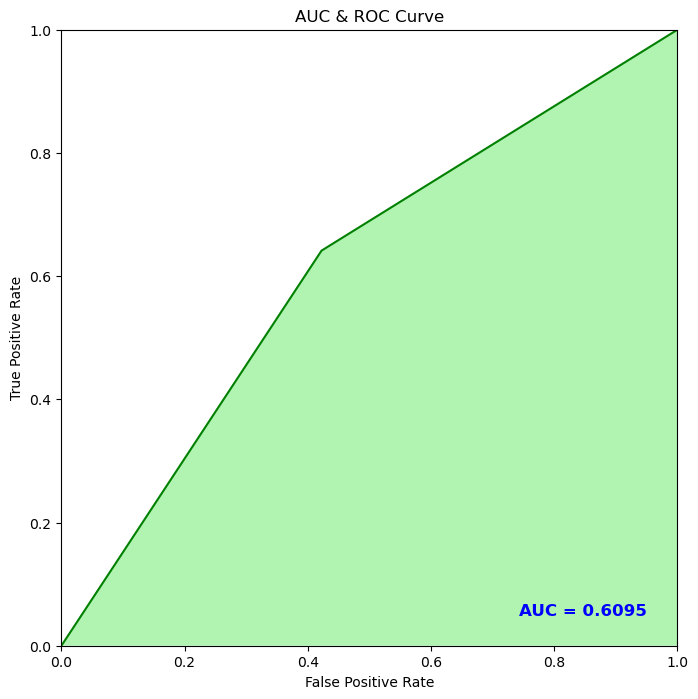

In [146]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

An AUC (Area Under the Curve) score of 0.6095 means that the binary classifier has performed better than random guessing but is still not very effective at distinguishing between the positive and negative classes.

The AUC measures the overall performance of the classifier over all possible classification thresholds, and it takes values between 0 and 1, where 0 indicates a completely ineffective classifier and 1 indicates a perfectly effective classifier.

An AUC score of 0.6095 suggests that the classifier's predictions are slightly better than random, but there is still a lot of room for improvement. An AUC score between 0.5 and 0.7 is generally considered to be a poor to fair performance, while an AUC score between 0.7 and 0.9 is considered to be a good to excellent performance, and an AUC score above 0.9 is considered to be an outstanding performance.

#### DECISION TREE

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
DT =DecisionTreeClassifier(criterion='entropy',
                             max_depth= 5,
                           min_samples_leaf= 2,
                             min_samples_split= 3)

In [149]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [150]:
y_pred = DT.predict(x_test)

In [151]:
print("Percision using DT on test Data: {:.2f} %".format(np.round(precision_score(y_test,y_pred),4)*100))
print("Recall using DT on test Data: {:.2f} %".format(np.round(recall_score(y_test,y_pred),4)*100))
print("Accuracy using DT on test Data: {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))
#print('Accuracy_score =',accuracy_score(y_test,y_pred))

Percision using DT on test Data: 100.00 %
Recall using DT on test Data: 100.00 %
Accuracy using DT on test Data: 100.00 %


In [152]:
print('Confusion_matrix =')
confusion_matrix(y_test,y_pred)

Confusion_matrix =


array([[566,   0],
       [  0, 566]], dtype=int64)

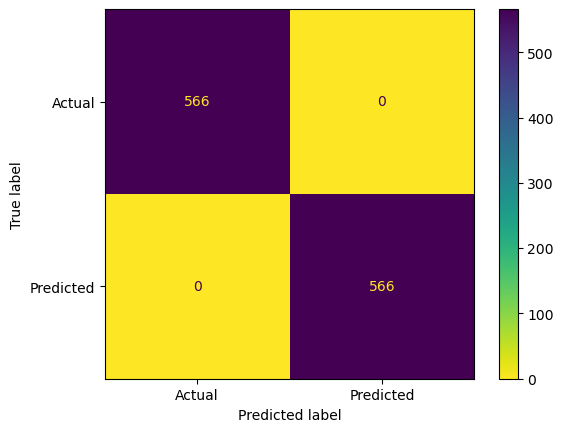

In [153]:
#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(DT, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       566

    accuracy                           1.00      1132
   macro avg       1.00      1.00      1.00      1132
weighted avg       1.00      1.00      1.00      1132



The classification report shown above provides several evaluation metrics for a binary classification problem. Here is what each of these metrics means:

Precision: The precision measures the proportion of true positives among all instances that the classifier predicted as positive. In this case, the precision for class 0 is 0.80, which means that among all instances that the classifier predicted as class 0, 80% were actually class 0.
Recall: The recall measures the proportion of true positives among all instances that are actually positive. In this case, the recall for class 0 is 0.92, which means that among all instances that are actually class 0, 92% were correctly predicted as class 0.
F1-score: The F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of the classifier's performance. In this case, the F1-score for class 0 is 0.85, which represents the balance between the precision and recall of class 0.
Support: The support is the number of instances that belong to each class.
The classification report also provides the overall accuracy of the classifier, which is the proportion of instances that were correctly classified regardless of their class. In this case, the accuracy is 0.84, which means that the classifier correctly classified 84% of the instances in the dataset.

Finally, the classification report includes the macro average and weighted average of precision, recall, and F1-score. The macro average computes the mean of these metrics for each class separately, whereas the weighted average takes into account the proportion of instances in each class. In this case, since the dataset is balanced (i.e., both classes have the same number of instances), the macro average and weighted average are the same.

In [155]:
Dectree_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
Dectree_df.tail(5)

,Actual,Predicted
4603,1,1
2899,1,1
885,0,0
2935,1,1
1111,0,0


### RANDOM FOREST CLASSIFIER

In [156]:
# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [157]:
#Fitting Decision Tree classifier to the training set  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [158]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[566,   0],
       [  0, 566]], dtype=int64)

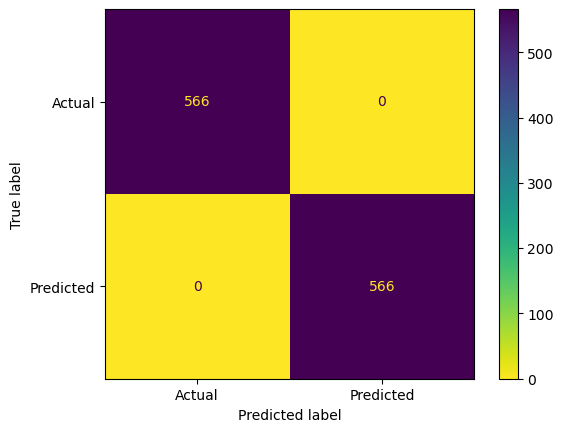

In [159]:
#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(classifier, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       566

    accuracy                           1.00      1132
   macro avg       1.00      1.00      1.00      1132
weighted avg       1.00      1.00      1.00      1132



This is an evaluation report,for class 0, precision is 1.00, which means that all the predictions made for class 0 are correct for class 1, precision is also 1.00, indicating that all the predictions made for class 1 are correct.
Recall is 0.99, meaning that the model correctly identified 99% of the actual class 0 samples. For class 1, recall is 1.00, indicating that the model correctly identified all the actual class 1 samples.
F1-score is 1.00, meaning that the model's performance is perfect for both classes.
Accuracy is 1.00, which means that the model correctly classified all the samples.
Macro-averaged f1-score is 1.00, indicating that the model's performance is perfect on average.
Weighted-averaged f1-score is 1.00, which means that the model's performance is perfect, taking into account the class imbalance.
Overall, this model seems to be performing exceptionally well on this dataset, with perfect scores for all metrics. However, it is essential to consider the dataset's characteristics, such as class imbalance, to determine if the model is genuinely performing well or if there is a bias in the evaluation.

In [161]:
RF_DF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
RF_DF.tail(5)

,Actual,Predicted
4603,1,1
2899,1,1
885,0,0
2935,1,1
1111,0,0


In [162]:
from sklearn.model_selection import cross_val_score
RF = RandomForestClassifier(n_estimators=100, random_state=8, class_weight={0:0.3, 1:0.7})
scores = cross_val_score(RF, X, y, cv=5, scoring='f1')
scores.mean()

0.9985964912280701

In [163]:
from sklearn.model_selection import GridSearchCV

p = {'n_estimators':[50,100,130],
     'max_depth':[4,5,6],
     'min_samples_split':[3,5],
     'criterion':['entropy','gini']}
RF = RandomForestClassifier(random_state=8)
GS = GridSearchCV(RF, p, cv=4, scoring='f1')
GS.fit(X, y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6], 'min_samples_split': [3, 5],
                         'n_estimators': [50, 100, 130]},
             scoring='f1')

In [164]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 3,
 'n_estimators': 100}

In [165]:
GS.best_score_

0.98708276933693

In [166]:
accuracy_score(y_test, y_pred)

1.0

### KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [170]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[522,  44],
       [134, 432]], dtype=int64)

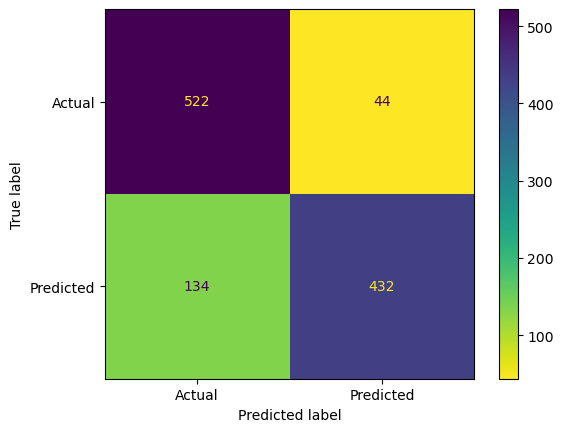

In [171]:
#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(knn, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [172]:
accuracy_score(y_test,y_pred)

0.842756183745583

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       566
           1       0.91      0.76      0.83       566

    accuracy                           0.84      1132
   macro avg       0.85      0.84      0.84      1132
weighted avg       0.85      0.84      0.84      1132



In [174]:
knn_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
knn_df.head(5)

,Actual,Predicted
3997,1,0
1514,0,0
1707,0,1
3179,1,0
3688,1,1


Precision measures how many of the predicted positive (class 1) instances were actually positive. In this case, the precision for class 0 is 0.80, meaning that of all the instances that the classifier predicted as class 0, 80% of them were actually class 0. The precision for class 1 is 0.91, meaning that of all the instances that the classifier predicted as class 1, 91% of them were actually class 1.

Recall measures how many of the actual positive instances were correctly identified as positive by the classifier. In this case, the recall for class 0 is 0.92, meaning that of all the instances that are actually class 0, 92% of them were correctly identified as class 0 by the classifier. The recall for class 1 is 0.76, meaning that of all the instances that are actually class 1, 76% of them were correctly identified as class 1 by the classifier.

F1-score is the harmonic mean of precision and recall, and it provides a combined measure of both metrics. In this case, the F1-score for class 0 is 0.85, and the F1-score for class 1 is 0.83.

Support is the number of instances in each class in the test set.

Accuracy is the proportion of instances that were correctly classified by the classifier. In this case, the overall accuracy of the classifier is 0.84, meaning that 84% of the instances in the test set were correctly classified.

Macro average is the unweighted mean of the precision, recall, and F1-score across both classes. In this case, the macro average precision is 0.85, the macro average recall is 0.84, and the macro average F1-score is 0.84.

Weighted average is the weighted mean of the precision, recall, and F1-score, taking into account the number of instances in each class. In this case, the weighted average precision, recall, and F1-score are all 0.85.

In [175]:
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,20):# range(1,20)
    clf3 = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal K')

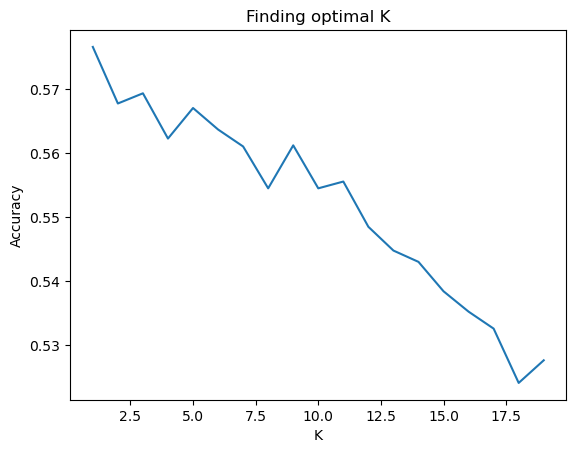

In [176]:
plt.plot(range(1,20),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [177]:
max(scores)

0.5765558698727015

In [178]:
scores

[0.5765558698727015,
 0.5677157001414428,
 0.5693069306930693,
 0.5622347949080622,
 0.567008486562942,
 0.5636492220650637,
 0.560997171145686,
 0.5544554455445545,
 0.5611739745403111,
 0.5544554455445545,
 0.5555162659123055,
 0.5484441301272984,
 0.5447312588401697,
 0.542963224893918,
 0.5383663366336634,
 0.5351838755304102,
 0.5325318246110325,
 0.524045261669024,
 0.5275813295615275]

In [179]:
scores = []
for i in range(1,10):# you should try range(1,20) , but for saving time I will try only 1 to 10
    clf3 = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=4,scoring='f1').mean())

Text(0.5, 1.0, 'Finding optimal K')

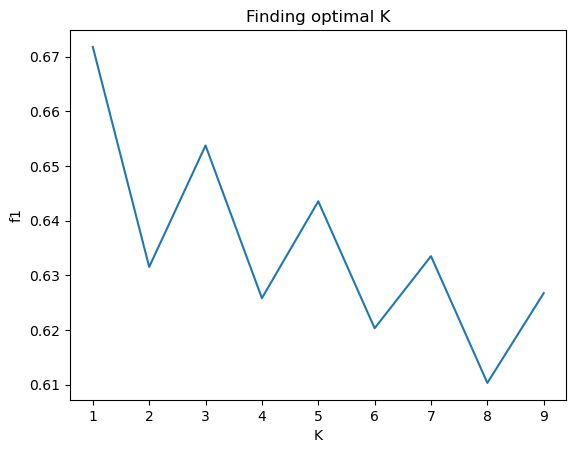

In [180]:
plt.plot(range(1,10),scores)
plt.xlabel("K")
plt.ylabel("f1")
plt.title("Finding optimal K")

In [181]:
scores

[0.671786631628398,
 0.6315508504342344,
 0.653759448834491,
 0.6258389883835439,
 0.6435499016137474,
 0.6203347026223839,
 0.6335197472448317,
 0.6103374841079847,
 0.6267630299391242]

I select k=6

In [182]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [183]:
#Model Evaluation
accuracy_score(y_train,knn.predict(x_train))

0.8536693191865605

In [184]:
accuracy_score(y_test,y_pred)

0.8215547703180212

Text(0.5, 1.0, 'The KNN Confusion Matrix')

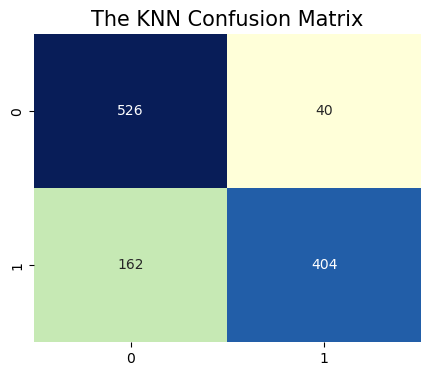

In [185]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True,fmt="d", cmap="YlGnBu", cbar=False)
plt.title("The KNN Confusion Matrix", size=15)

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       566
           1       0.91      0.71      0.80       566

    accuracy                           0.82      1132
   macro avg       0.84      0.82      0.82      1132
weighted avg       0.84      0.82      0.82      1132



In [187]:
param= {'n_neighbors':(5,6,7)}

In [188]:
from sklearn.model_selection import GridSearchCV
#downsampling
KNN =KNeighborsClassifier()
model=GridSearchCV(KNN,param,cv=5,scoring='f1') 
model.fit(X,y)
model.best_params_

{'n_neighbors': 5}

In [189]:
model.best_estimator_

KNeighborsClassifier()

In [190]:
"""K-FOLD CROSSVALIDATION"""
KNN = model.best_estimator_
scores=cross_val_score(KNN,X,y,cv=5)
KNN_DS_score=scores.mean()
KNN_DS_score

0.5926527698368809

In [191]:
KNN =  model.best_estimator_
scores=cross_val_score(KNN,X,y,cv=5,scoring='f1')
KNN_DS_f1score=scores.mean()
KNN_DS_f1score

0.6582414006161227

### SVM (SUPPORT VECTOR MACHINE)

In [192]:
from sklearn import svm
#Creating a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [193]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[479,  87],
       [ 80, 486]], dtype=int64)

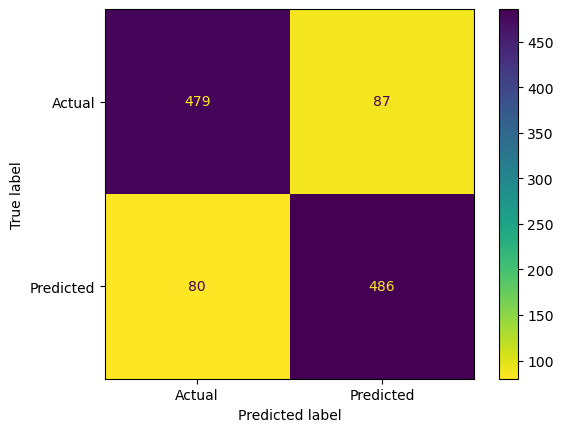

In [194]:
#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(clf, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       566
           1       0.85      0.86      0.85       566

    accuracy                           0.85      1132
   macro avg       0.85      0.85      0.85      1132
weighted avg       0.85      0.85      0.85      1132



In [196]:
svm_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
svm_df.head(5)

,Actual,Predicted
3997,1,1
1514,0,0
1707,0,1
3179,1,0
3688,1,1


In [197]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.671 total time=   2.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.690 total time=   1.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.674 total time=   1.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.678 total time=   1.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   1.7s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.726 total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.768 total time=   1.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.754 total time=   1.4s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.741 total time=   1.4s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.765 total time=   1.4s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.611 total time=   1.5s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [198]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01}
SVC(C=1000, gamma=0.01)


In [199]:
#Create a svm Classifier
clf = svm.SVC(C=1000, gamma=1) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [200]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       566
           1       1.00      0.99      1.00       566

    accuracy                           1.00      1132
   macro avg       1.00      1.00      1.00      1132
weighted avg       1.00      1.00      1.00      1132



Text(0.5, 1.0, 'The SVM Confusion Matrix')

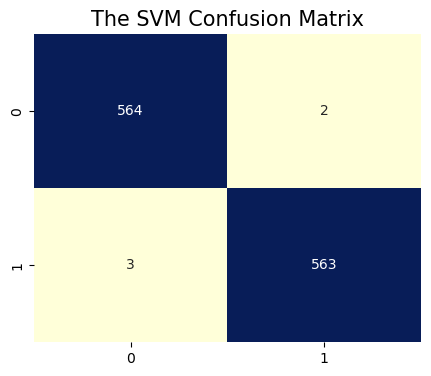

In [201]:
cm= confusion_matrix(y_test, grid_predictions) 
#cm
#con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True,fmt="d", cmap="YlGnBu", cbar=False)
plt.title("The SVM Confusion Matrix", size=15)

### XGBOOST  (Extreme Gradient Boosting)

In [202]:
import xgboost as xgb

In [203]:
#create a classfier
xgb_cls = xgb.XGBClassifier()

In [204]:
#Train the classifier
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [205]:
#make predictions
y_pred = xgb_cls.predict(x_test)

Confusion Matrix:
[[566   0]
 [  0 566]]


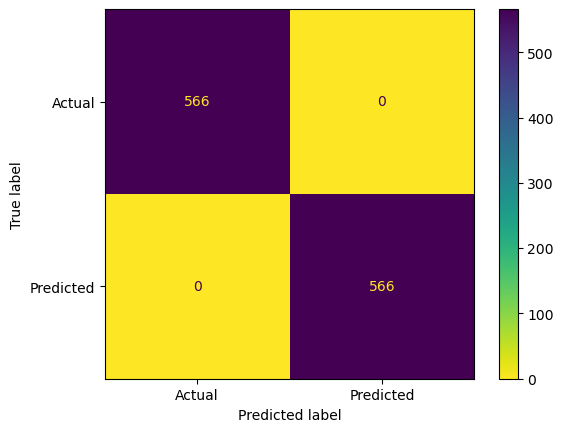

In [206]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#plot Confusion Matrix
from sklearn.metrics import plot_confusion_matrix ,classification_report
disp = plot_confusion_matrix(xgb_cls, x_test, y_test,
                              display_labels=['Actual','Predicted'],
                              cmap=plt.cm.viridis_r)


In [207]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       566

    accuracy                           1.00      1132
   macro avg       1.00      1.00      1.00      1132
weighted avg       1.00      1.00      1.00      1132



In [208]:
xgb_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
xgb_df.tail(5)

,Actual,Predicted
4603,1,1
2899,1,1
885,0,0
2935,1,1
1111,0,0


In [209]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 'max_depth': [3, 4, 5],
 'learning_rate': [0.1, 0.01, 0.001],
 'n_estimators': [100, 500, 1000]
}
grid_search = GridSearchCV(estimator = xgb_cls, param_grid = param_grid, 
                       cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


#### Plot Important Features

In [210]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [211]:
# train the XGBoost model
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

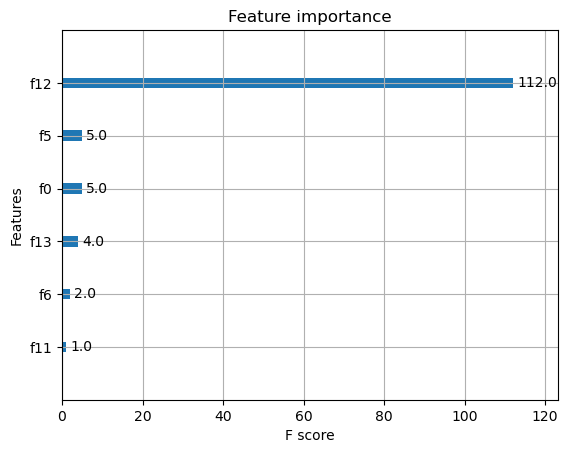

In [212]:
# plot feature importance scores
plot_importance(model)
plt.show()

In [213]:
importance = model.get_booster().get_score(importance_type='weight')

In [214]:
importance

{'f0': 5.0, 'f5': 5.0, 'f6': 2.0, 'f11': 1.0, 'f12': 112.0, 'f13': 4.0}

In [ ]:
importance = model.get_booster().get_score(importance_type='gain')

In [ ]:
importance